# Table of Contents

1. **[Import Libraries](#lib)**
2. **[Import Dataset](#import)**
3. **[Exploratory Data Analysis](#EDA)**
4. **[Statistical Tests](#stat)**
5. **[Outliers](#outliers)**
6. **[Multicollinearity](#mult)**
7. **[Feature Engineering](#feat)**
8. **[Model Building](#model)**

<a id="lib"></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('max.column', None)

import plotly.express as px
from matplotlib import cm

In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import category_encoders as ce

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report, accuracy_score

In [4]:
# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

In [5]:
import plotly.offline as pyo
pyo.init_notebook_mode()

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
from sklearn.model_selection import  GridSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

In [8]:
from sklearn.feature_selection import RFE

<a id="import"></a>

# Import Dataset

We import the dataset and obtain basic summary statistics of the data.

In [9]:
# read dataset

df = pd.read_csv('Lending Club 2016_2018.csv')

# create a copy of the original
df_orig = df.copy()

In [10]:
df.head()

id    loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0  130956066  3000.000000  3000.000000      3000.000000   36 months  7.340000   
1  130968727  5000.000000  5000.000000      5000.000000   36 months 11.980000   
2  130910225  7000.000000  7000.000000      7000.000000   36 months 11.980000   
3  130966492 30000.000000 30000.000000     30000.000000   36 months 21.850000   
4  130942737 21000.000000 21000.000000     21000.000000   60 months 20.390000   

   installment grade emp_length home_ownership   annual_inc  \
0    93.100000     A    9 years           RENT 52000.000000   
1   166.030000     B  10+ years            OWN 55000.000000   
2   232.440000     B   < 1 year       MORTGAGE 40000.000000   
3  1143.390000     D  10+ years            OWN 57000.000000   
4   560.940000     D  10+ years            OWN 85000.000000   

  verification_status             purpose addr_state       dti  delinq_2yrs  \
0     Source Verified      major_purchase         WA  0.580000     0.000000   
1        Not Verified               other         GA 14.180000     0.000000   
2            Verified    home_improvement         TX 20.250000     0.000000   
3            Verified  debt_consolidation         FL 27.580000     0.000000   
4     Source Verified               house         NY 15.760000     1.000000   

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
0        0.000000               26.000000                     NaN  7.000000   
1        0.000000               74.000000               82.000000 14.000000   
2        0.000000               60.000000                     NaN 13.000000   
3        1.000000               68.000000                     NaN 11.000000   
4        0.000000                2.000000                     NaN 15.000000   

   pub_rec    revol_bal  revol_util  total_acc initial_list_status  \
0 0.000000   141.000000    0.500000  30.000000                   w   
1 1.000000 11449.000000   33.900000  24.000000                   w   
2 0.000000  5004.000000   36.000000  29.000000                   w   
3 0.000000 29222.000000   53.200000  26.000000                   w   
4 0.000000 14591.000000   34.200000  27.000000                   w   

   collections_12_mths_ex_med  mths_since_last_major_derog  tot_coll_amt  \
0                    0.000000                          NaN      0.000000   
1                    0.000000                    74.000000      0.000000   
2                    0.000000                    60.000000      0.000000   
3                    0.000000                    68.000000      0.000000   
4                    0.000000                          NaN      0.000000   

    tot_cur_bal   issue_d  chargeoff_within_12_mths  acc_now_delinq  mort_acc  \
0 150592.000000  Mar-2018                  0.000000        0.000000  4.000000   
1  28880.000000  Mar-2018                  0.000000        0.000000  0.000000   
2 131726.000000  Mar-2018                  0.000000        0.000000  0.000000   
3 157566.000000  Mar-2018                  0.000000        0.000000  2.000000   
4 128270.000000  Mar-2018                  0.000000        0.000000  3.000000   

   mths_since_recent_bc_dlq  num_accts_ever_120_pd  pct_tl_nvr_dlq  \
0                       NaN               0.000000       96.700000   
1                       NaN               1.000000       95.700000   
2                 64.000000               3.000000       89.700000   
3                       NaN               1.000000       96.000000   
4                       NaN               0.000000       92.600000   

   pub_rec_bankruptcies  tot_hi_cred_lim  loan_status  
0              0.000000    191216.000000            0  
1              1.000000     61551.000000            0  
2              0.000000    132817.000000            0  
3              0.000000    188780.000000            0  
4              0.000000    172433.000000            0

In [12]:
df.shape

(518706, 39)

The dataset contains 518706 observations and 39 features.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518706 entries, 0 to 518705
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           518706 non-null  int64  
 1   loan_amnt                    518706 non-null  float64
 2   funded_amnt                  518706 non-null  float64
 3   funded_amnt_inv              518706 non-null  float64
 4   term                         518706 non-null  object 
 5   int_rate                     518706 non-null  float64
 6   installment                  518706 non-null  float64
 7   grade                        518706 non-null  object 
 8   emp_length                   482772 non-null  object 
 9   home_ownership               518706 non-null  object 
 10  annual_inc                   518706 non-null  float64
 11  verification_status          518706 non-null  object 
 12  purpose                      518706 non-null  object 
 13 

In [14]:
# statistical summary

df.describe()

id     loan_amnt   funded_amnt  funded_amnt_inv  \
count    518706.000000 518706.000000 518706.000000    518706.000000   
mean   96024622.487182  14457.927950  14457.927950     14452.578478   
std    20596273.139341   9227.101380   9227.101380      9224.707175   
min       55716.000000   1000.000000   1000.000000       725.000000   
25%    77138989.250000   7200.000000   7200.000000      7200.000000   
50%    92379357.000000  12000.000000  12000.000000     12000.000000   
75%   112646799.000000  20000.000000  20000.000000     20000.000000   
max   145636374.000000  40000.000000  40000.000000     40000.000000   

           int_rate   installment      annual_inc           dti   delinq_2yrs  \
count 518706.000000 518706.000000   518706.000000 518334.000000 518706.000000   
mean      13.395220    444.042898    78975.296566     18.778012      0.327895   
std        5.301054    281.965662    77463.678724     14.522484      0.908625   
min        5.310000     30.120000        0.000000     -1.000000      0.000000   
25%        9.490000    237.230000    48000.000000     11.820000      0.000000   
50%       12.740000    368.940000    66000.000000     17.830000      0.000000   
75%       16.020000    597.627500    95000.000000     24.580000      0.000000   
max       30.990000   1719.830000 10999200.000000    999.000000     29.000000   

       inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
count   518705.000000           264252.000000            99889.000000   
mean         0.587785               34.456231               70.650762   
std          0.870538               21.980026               24.907342   
min          0.000000                0.000000                0.000000   
25%          0.000000               16.000000               55.000000   
50%          0.000000               31.000000               73.000000   
75%          1.000000               50.000000               88.000000   
max          5.000000              226.000000              124.000000   

           open_acc       pub_rec      revol_bal    revol_util     total_acc  \
count 518706.000000 518706.000000  518706.000000 518293.000000 518706.000000   
mean      11.759110      0.244522   15822.435281     47.187167     24.599029   
std        5.760490      0.629787   23048.027166     24.857034     12.231060   
min        0.000000      0.000000       0.000000      0.000000      2.000000   
25%        8.000000      0.000000    5398.000000     28.000000     16.000000   
50%       11.000000      0.000000   10403.000000     46.400000     23.000000   
75%       15.000000      0.000000   18784.000000     65.900000     31.000000   
max       88.000000     61.000000 1696796.000000    172.000000    176.000000   

       collections_12_mths_ex_med  mths_since_last_major_derog   tot_coll_amt  \
count               518706.000000                146471.000000  518706.000000   
mean                     0.021654                    44.541029     279.287972   
std                      0.165566                    21.698705   11592.617701   
min                      0.000000                     0.000000       0.000000   
25%                      0.000000                    27.000000       0.000000   
50%                      0.000000                    44.000000       0.000000   
75%                      0.000000                    62.000000       0.000000   
max                     12.000000                   226.000000 6214661.000000   

         tot_cur_bal  chargeoff_within_12_mths  acc_now_delinq      mort_acc  \
count  518706.000000             518706.000000   518706.000000 518706.000000   
mean   146104.852198                  0.009395        0.005279      1.551945   
std    163141.925632                  0.113425        0.077202      1.849522   
min         0.000000                  0.000000        0.000000      0.000000   
25%     30005.000000                  0.000000        0.000000      0.000000   
50%     83879.500000                  0.000000        0.00000

'id' contains all unique values and can be dropped.

In [15]:
# categorical variables

df.describe(include = object)

term   grade emp_length home_ownership verification_status  \
count       518706  518706     482772         518706              518706   
unique           2       7         11              5                   3   
top      36 months       C  10+ years       MORTGAGE     Source Verified   
freq        402159  156452     173682         256123              212745   

                   purpose addr_state initial_list_status   issue_d  
count               518706     518706              518706    518706  
unique                  13         50                   2        36  
top     debt_consolidation         CA                   w  Mar-2016  
freq                293091      73444              397143     48937

Address state contains a large number of unqiue categories. 

## Handling Missing Values

In [16]:
df.isnull().sum().sort_values(ascending=False)[:10]/len(df)

mths_since_last_record        0.807427
mths_since_recent_bc_dlq      0.757543
mths_since_last_major_derog   0.717622
mths_since_last_delinq        0.490555
emp_length                    0.069276
revol_util                    0.000796
dti                           0.000717
pct_tl_nvr_dlq                0.000002
inq_last_6mths                0.000002
id                            0.000000
dtype: float64

There are a lot of null values in the dataset. For the features 'mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_last_major_derog', 'mths_since_last_delinq' we can not simply drop the null values, since the null values indicate people who have no record of attributes such as deliquency. This information is useful and cannot be dropped.

In [21]:
df.shape

(56311, 35)

In [17]:
# For features with less than 5% null values we drop rows

df.dropna(subset = ['emp_length','dti','revol_util','pct_tl_nvr_dlq','inq_last_6mths'], inplace = True)

In [18]:
# For the following features we have performed a type of ordinal encoding 
# The null values have been impute

cols = ['mths_since_last_major_derog','mths_since_recent_bc_dlq','mths_since_last_record','mths_since_last_delinq']

df[cols].head()

mths_since_last_major_derog  mths_since_recent_bc_dlq  \
0                          NaN                       NaN   
1                    74.000000                       NaN   
2                    60.000000                 64.000000   
3                    68.000000                       NaN   
4                          NaN                       NaN   

   mths_since_last_record  mths_since_last_delinq  
0                     NaN               26.000000  
1               82.000000               74.000000  
2                     NaN               60.000000  
3                     NaN               68.000000  
4                     NaN                2.000000

In [19]:
for i in cols:
    max_val = df[i].max() + 1
    df[i].fillna(max_val, inplace = True)

In [20]:
df[cols].head()

mths_since_last_major_derog  mths_since_recent_bc_dlq  \
0                   227.000000                203.000000   
1                    74.000000                203.000000   
2                    60.000000                 64.000000   
3                    68.000000                203.000000   
4                   227.000000                203.000000   

   mths_since_last_record  mths_since_last_delinq  
0              125.000000               26.000000  
1               82.000000               74.000000  
2              125.000000               60.000000  
3              125.000000               68.000000  
4              125.000000                2.000000

In [21]:
# check if all null values have been removed
(df.isnull().sum()>0).sum()

0

In [22]:
# dropping redundant columns
df_copy = df.copy()
df = df.drop(['id','funded_amnt','funded_amnt_inv','issue_d'], axis=1, errors = 'ignore')

In [23]:
# We can combine categories with Home Ownership 'ANY' and 'NONE' into 'Other'

df['home_ownership'].replace('ANY','OTHER', inplace=True)
df['home_ownership'].replace('NONE','OTHER', inplace=True)

<a id="EDA"></a>

# Exploratory Data Analysis

## Univariate

### Numeric variables

In [24]:
# storing all numeric columns

num_cols = df.select_dtypes(np.number).columns

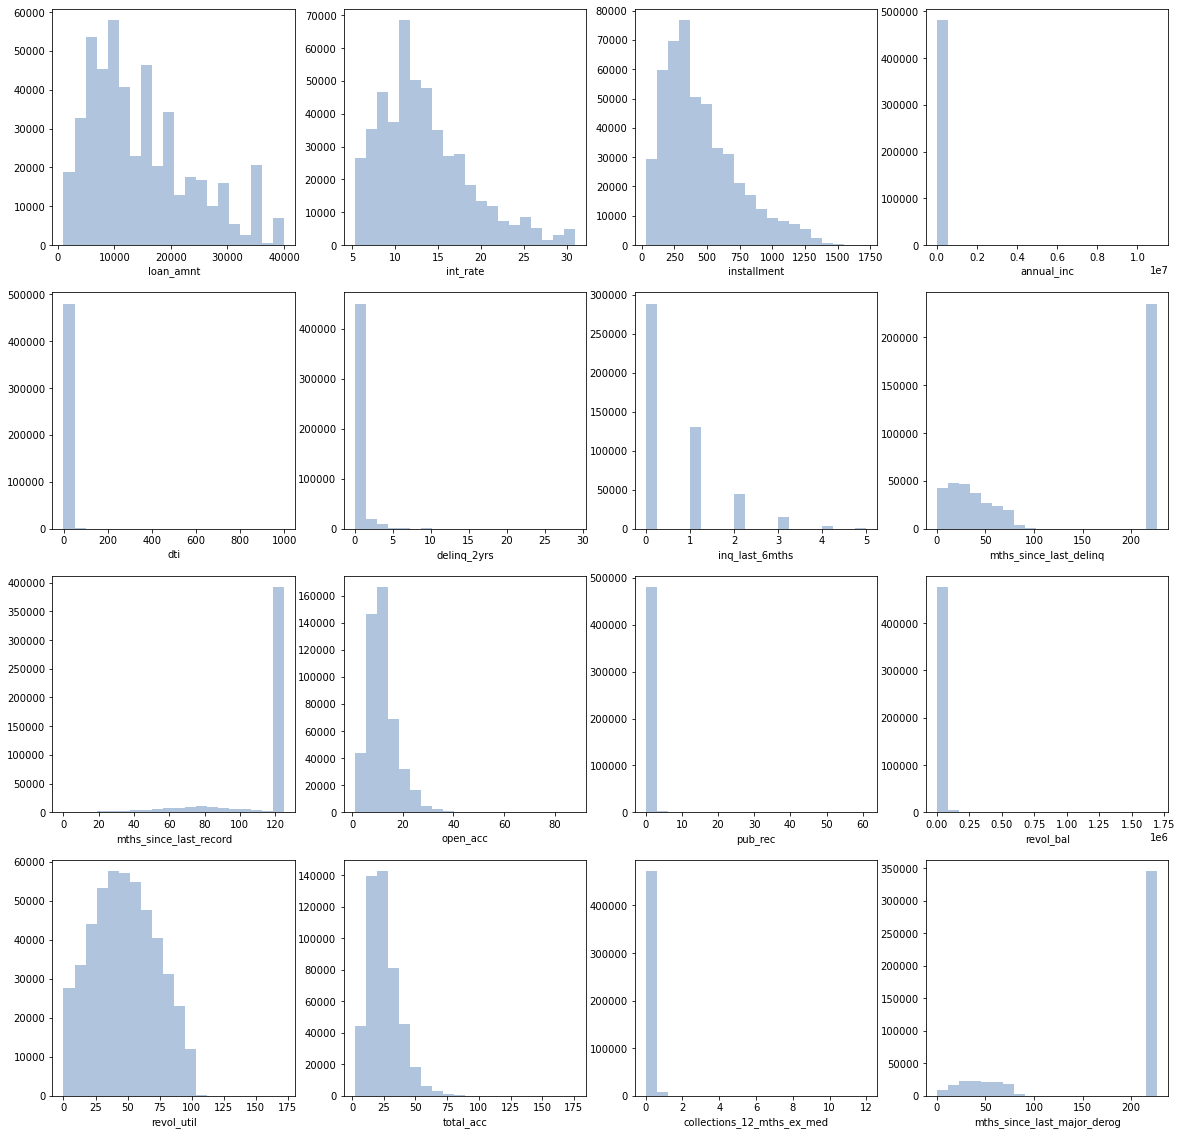

In [28]:
# plotting histograms of numeric variables : Set 1

plt.figure(figsize = (20,20))

num_cols_1 = num_cols[0:17]

for i in range(0,len(num_cols_1)-1):
    plt.subplot(4,4,i+1)
    plt.hist(df[num_cols_1[i]],color = "lightsteelblue", bins = 20)
    plt.xlabel(num_cols_1[i])

The following features appear strongly right-skewed: funded_amount, funded_amount_inv, int_rate, installment, annual_inc, loan_amnt, pub_rec

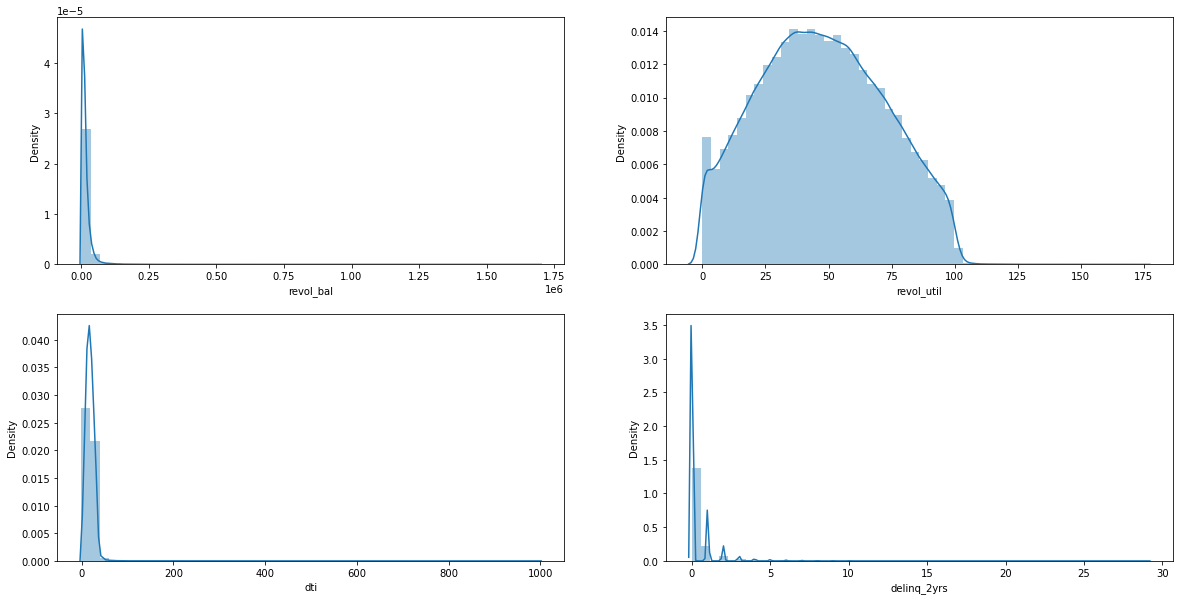

In [52]:
# certain distributions appear right skewed with extreme outliers 
# we can plot them separately 
plt.figure(figsize = (20,10))

cols_to_plot = ['revol_bal','revol_util','dti','delinq_2yrs']

for i in range(4):
    plt.subplot(2,2,i+1)
    sns.distplot(df[cols_to_plot[i]])

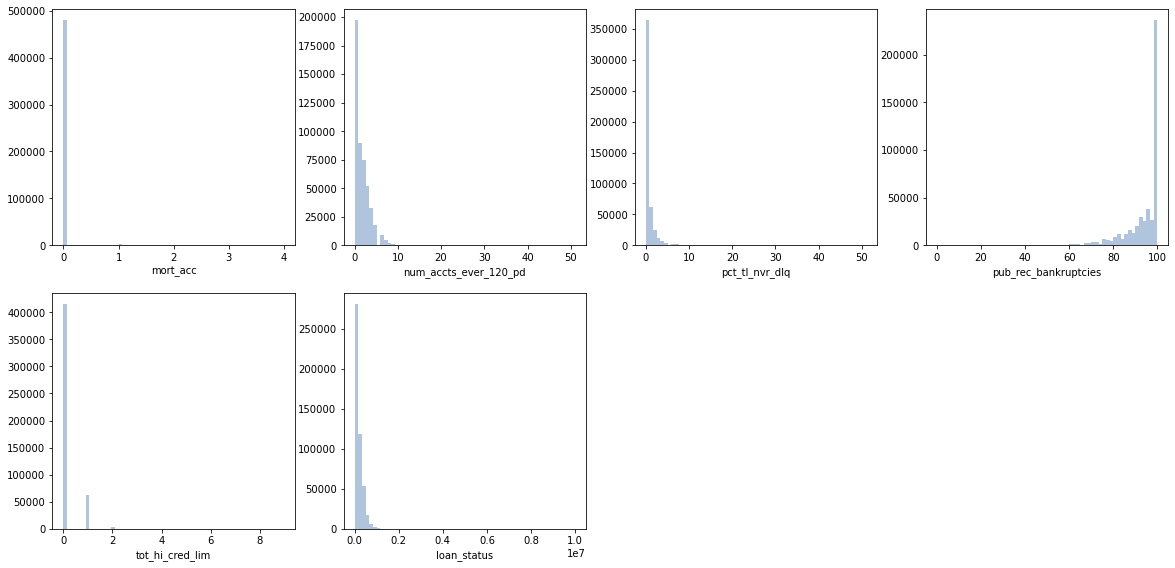

In [53]:
# plotting histograms of numeric variables : Set 2

num_cols_2 = num_cols[17:29]

plt.figure(figsize = (20,20))

for i in range(1,len(num_cols_2)):
    plt.subplot(4,4,i)
    plt.hist(df[num_cols_2[i-1]],color = "lightsteelblue", bins = 60)
    plt.xlabel(num_cols_2[i])

# Outliers

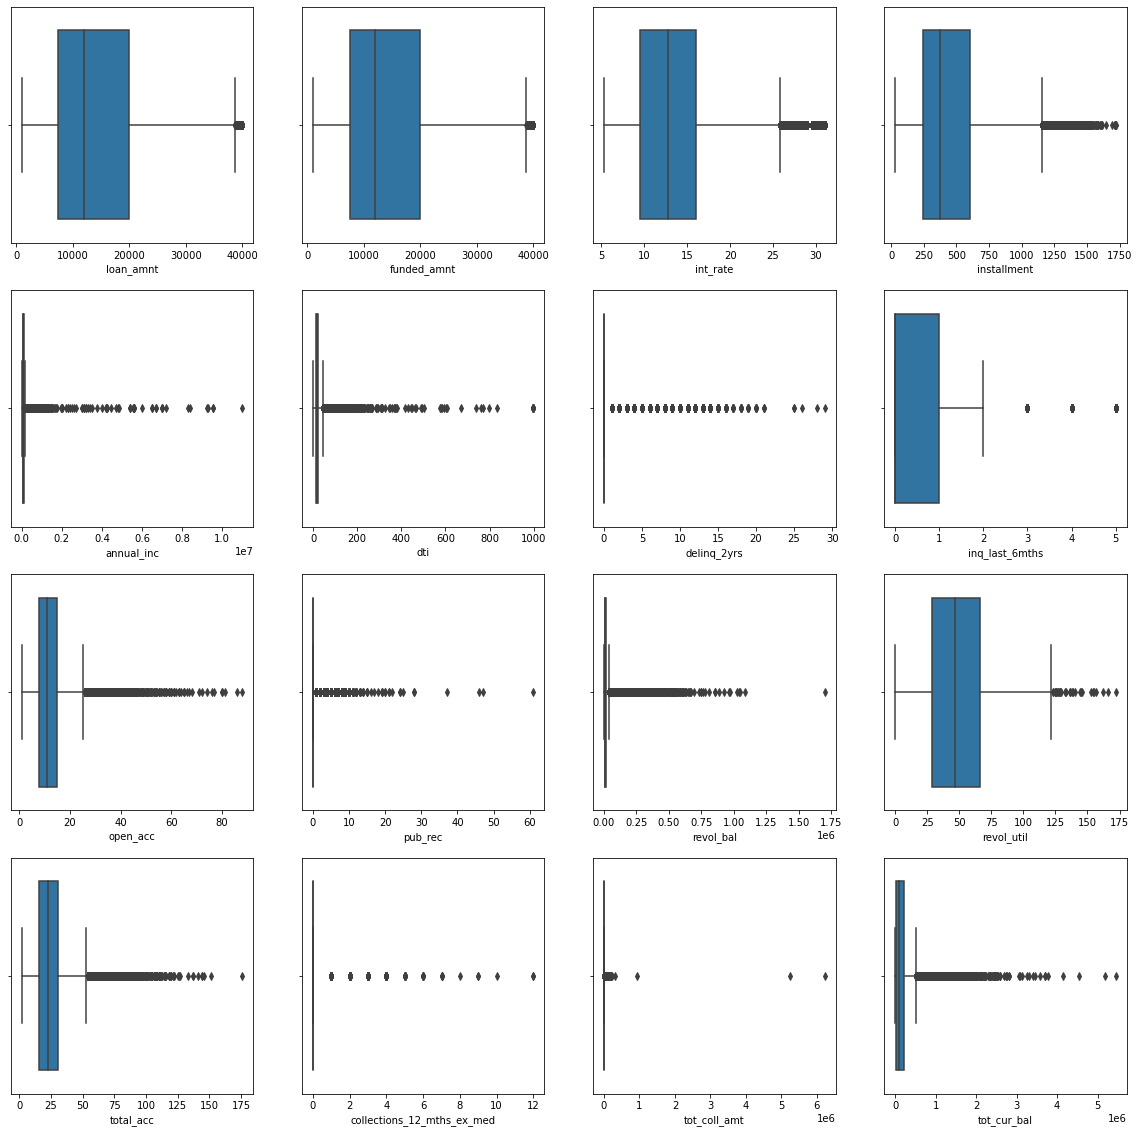

In [54]:
# plotting boxplot of numeric variables : Set 1

plt.figure(figsize = (20,20))

num_cols_1 = num_cols[0:17]

for i in range(1,len(num_cols_1)):
    plt.subplot(4,4,i)
    sns.boxplot(df[num_cols_1[i-1]])

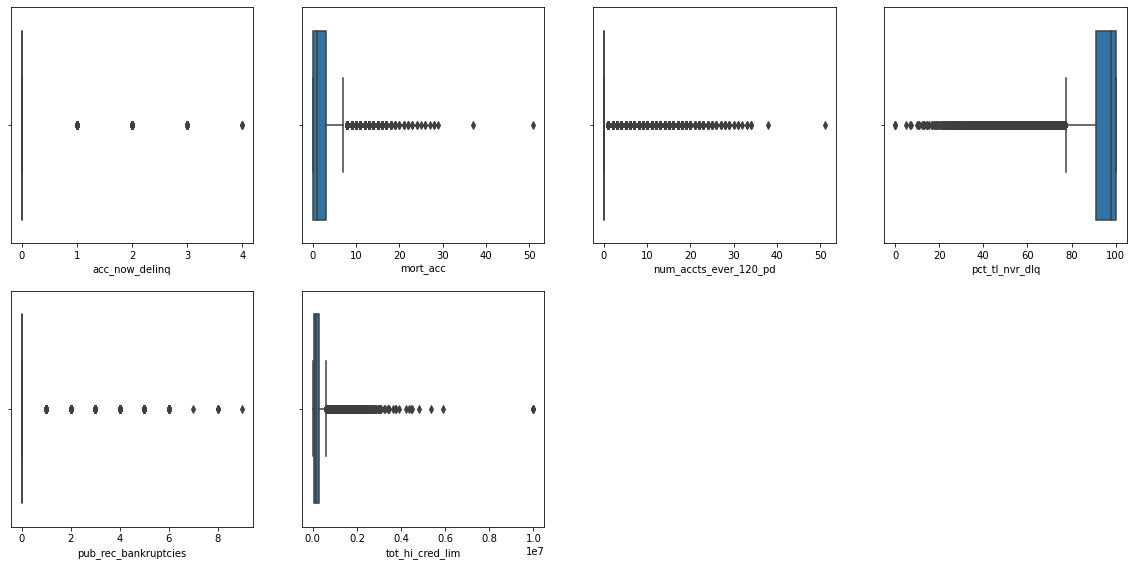

In [55]:
# plotting boxplot of numeric variables : Set 2

plt.figure(figsize = (20,20))

for i in range(1,len(num_cols_2)):
    plt.subplot(4,4,i)
    sns.boxplot(df[num_cols_2[i-1]])

### Categorical Univariate

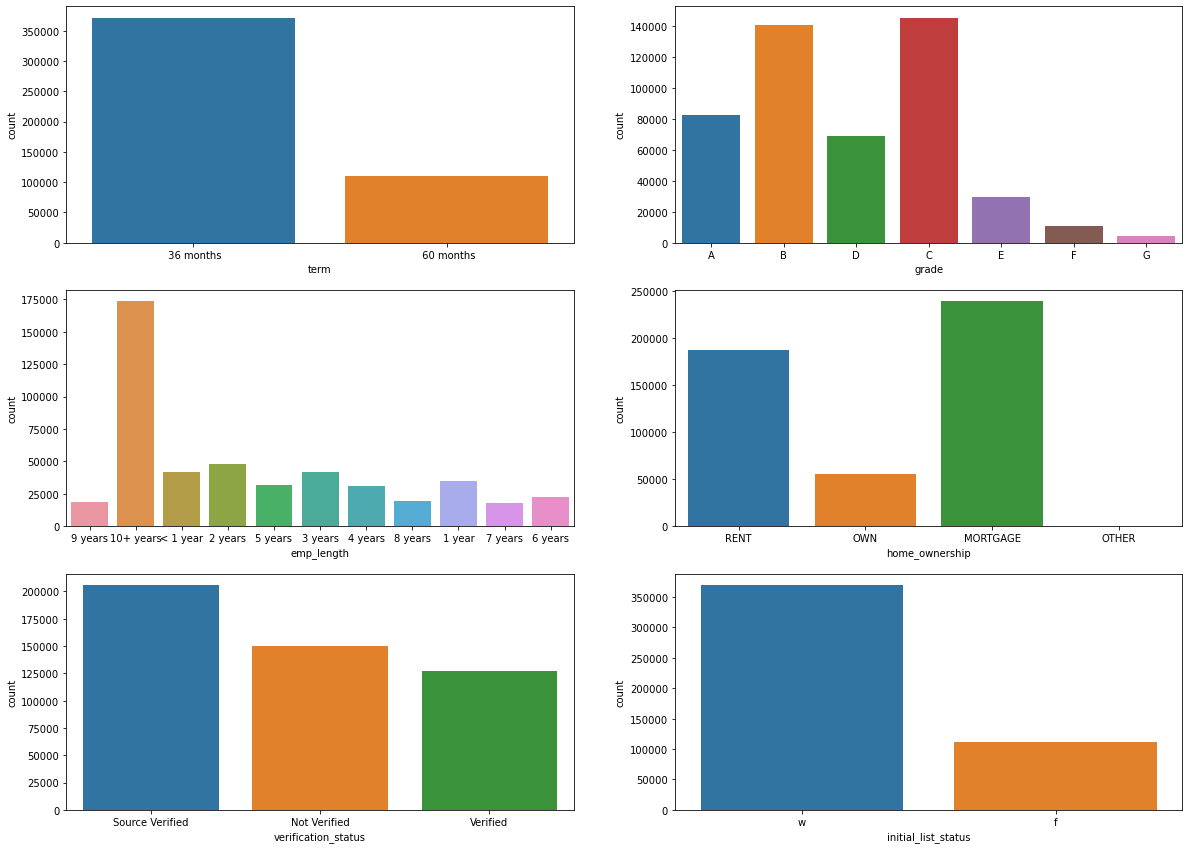

In [56]:
# analysing unqiue values and their counts in categorical variables

plt.figure(figsize = (20,20))

cat_cols_1 = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
              'initial_list_status','issue_d']

for i in range(1,len(cat_cols_1)):
    plt.subplot(4,2,i)
    sns.countplot(df[cat_cols_1[i-1]])

From the plot we can draw the following insights:
Majority of the applicants have mortgaged homes.
Most applicants have 10+ years of work experience.
Most loans are taken for 36 month term.
Most loan applicants are given 'Wait' as the initial list status.

<AxesSubplot:xlabel='purpose', ylabel='count'>

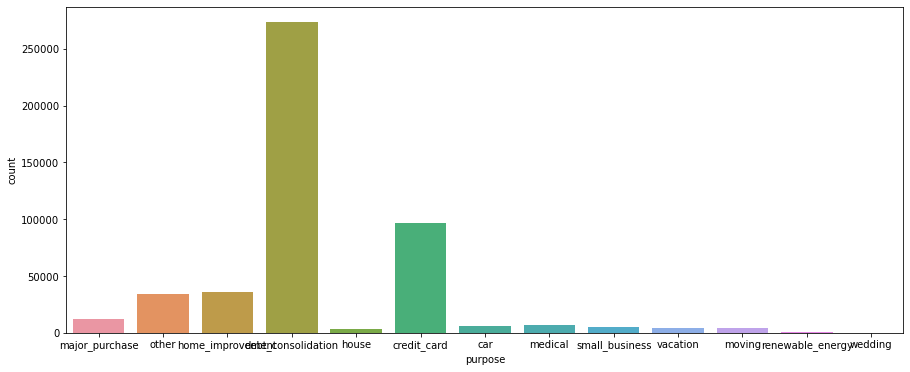

In [29]:
plt.figure(figsize = (15,6))

sns.countplot(df['purpose'])

The most common purpose for loan is debt consolidation, followed by credit card

In [ ]:
plt.figure(figsize = (20,6))

sns.countplot(df['addr_state'])

Maximum observations are from california.

## Target variable

<AxesSubplot:xlabel='loan_status', ylabel='count'>

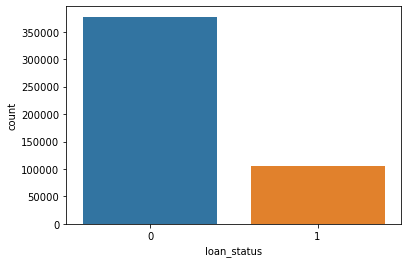

In [59]:
sns.countplot(df['loan_status'])

The target variable is imbalanced.

## Analyzing relationship between target and numeric variables

In [610]:
ncols = ['loan_amnt','funded_amnt','int_rate','installment','annual_inc','dti','tot_cur_bal','delinq_2yrs',
         'inq_last_6mths','open_acc','pub_rec',
         'revol_bal','revol_util','total_acc','collections_12_mths_ex_med','tot_coll_amt','chargeoff_within_12_mths',
         'pct_tl_nvr_dlq','pub_rec_bankruptcies']

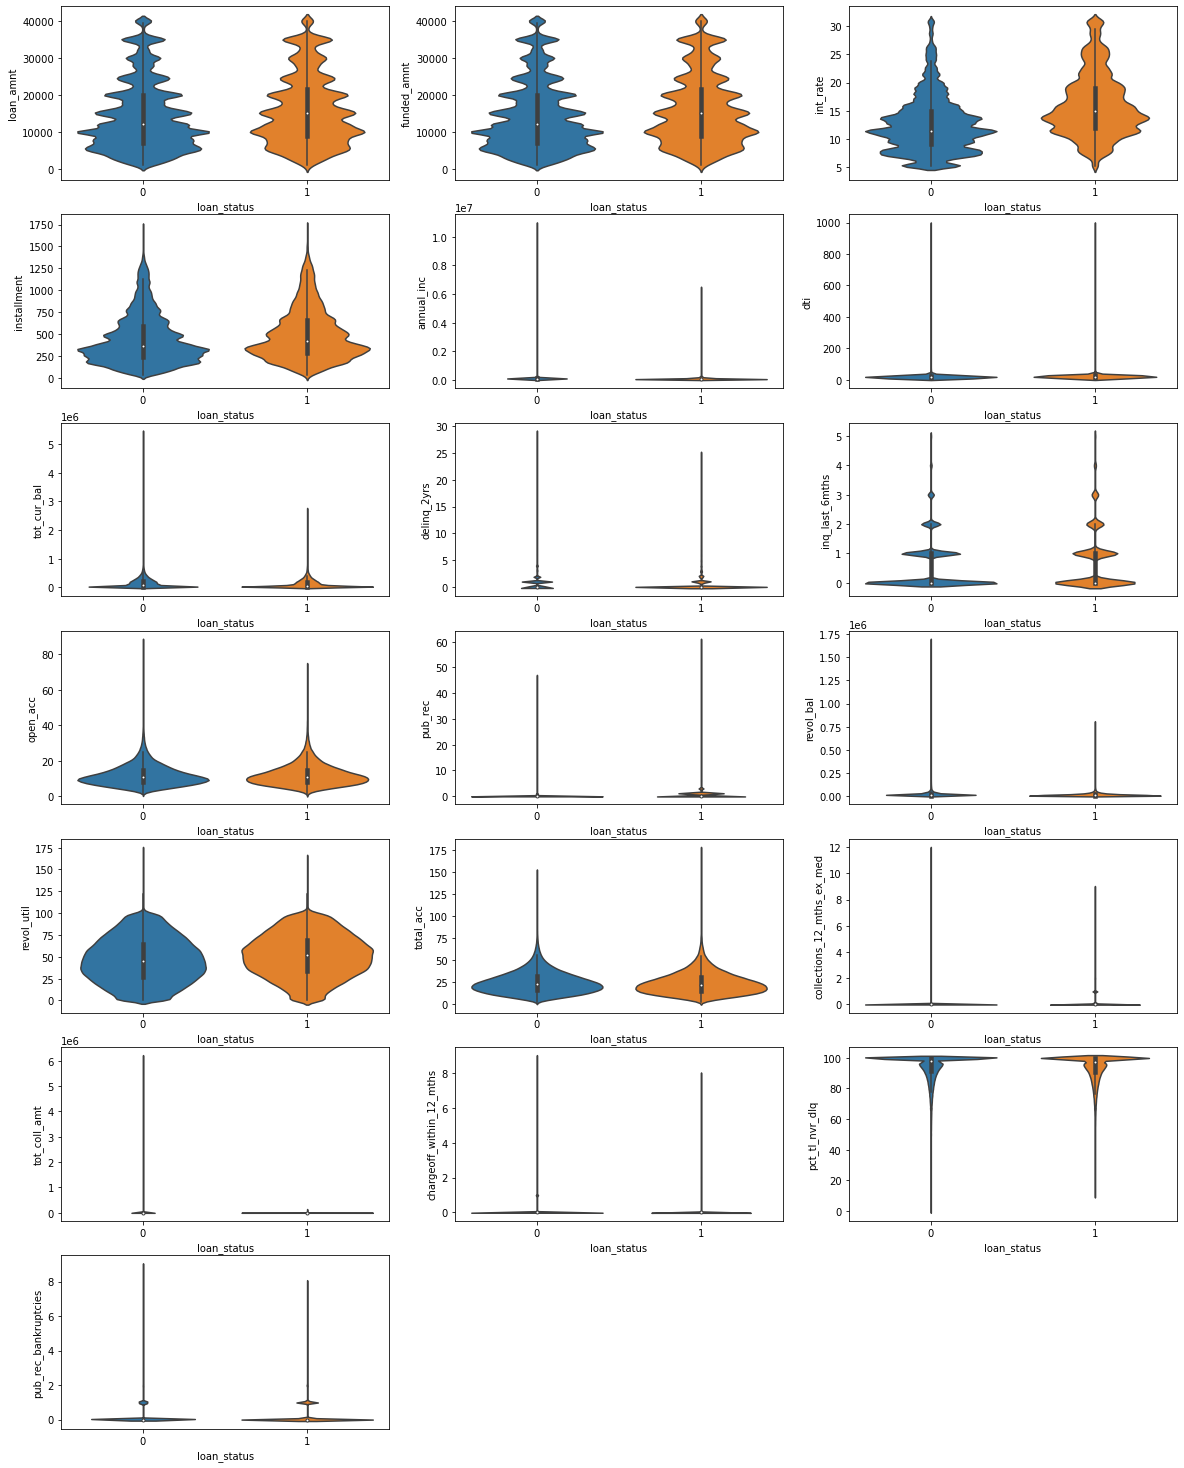

In [611]:
plt.figure(figsize = (20,30))

for i in range(1,len(ncols)+1):
    plt.subplot(8,3,i)
    sns.violinplot(x=df['loan_status'],y= df[ncols[i-1]])

plt.show()

Most distributions are right skewed. The plots indicate that there are outliers in most of the features. Also the plots look similar for loan status Fully paid and Charged-off.
 
We can also notice that there are greater proportion of people with higher interest rates in charged-off when compared to fully paid.

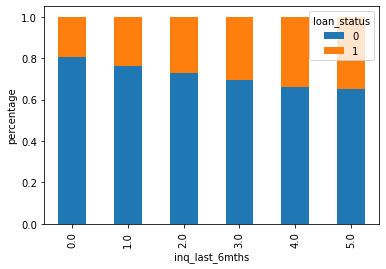

In [770]:
pd.crosstab(df['inq_last_6mths'],df['loan_status'], normalize = 'index').plot(kind = 'bar', stacked = True)

plt.ylabel('percentage')

plt.show()

The above graph can be interpreted as follows: 

Out of all the people who have made 0 inquiries 20 % have defaulted.

The percentage of loan defaulters is greater for larger numbers of inquiries.


## Analyzing relationships between independent variables

<AxesSubplot:xlabel='home_ownership', ylabel='loan_amnt'>

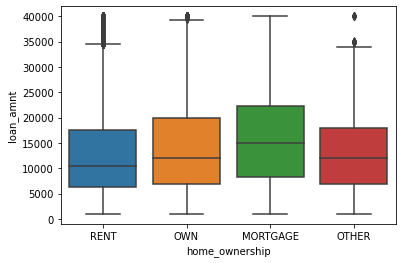

In [62]:
# Does home ownership affect Loan Amount 

sns.boxplot(data = df, x = 'home_ownership', y = 'loan_amnt')

There is a slight variation in the medians. Mortgage has the highest median loan_amount compared to other categories.

In [63]:
# Is home ownership related to verification status (Do people with verified sources of income tend to own homes?) 

pd.crosstab(df['verification_status'], df['home_ownership'], normalize='columns')

home_ownership       MORTGAGE    OTHER      OWN     RENT
verification_status                                     
Not Verified         0.334577 0.339623 0.311196 0.278467
Source Verified      0.399737 0.411321 0.444540 0.456789
Verified             0.265687 0.249057 0.244264 0.264744

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

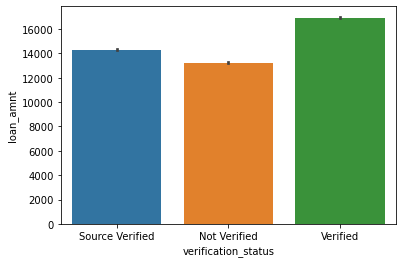

In [64]:
# Does verification status affect loan amount 

sns.barplot(data = df, x = 'verification_status', y = 'loan_amnt')

The average loan amount is slightly higher for those with verified income.

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

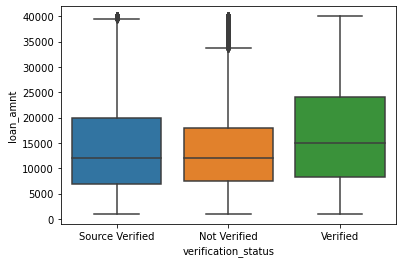

In [65]:
sns.boxplot(data = df, x = 'verification_status', y = 'loan_amnt')

<AxesSubplot:xlabel='dti', ylabel='loan_amnt'>

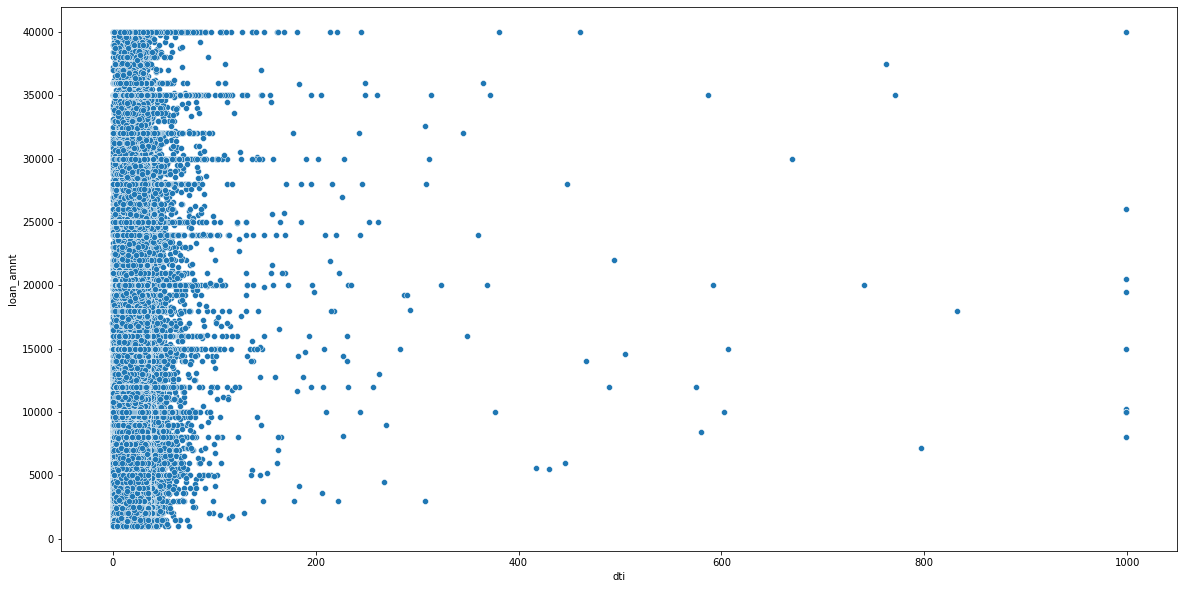

In [66]:
# Debt to Income vs Loan amount (Were people with high DTI given lower loan amounts?) 

plt.figure(figsize = (20,10))

sns.scatterplot(x = df['dti'], y = df['loan_amnt'])

There does not seem to be any relation between dti and loan amount.
There are outliers in the plot with very high dti and loan amount.

In [ ]:
#Average Loan amounts provided per state

<img src="loan_amt_map.png">

Alaska has the highest average loan amount.

<AxesSubplot:xlabel='addr_state', ylabel='home_ownership'>

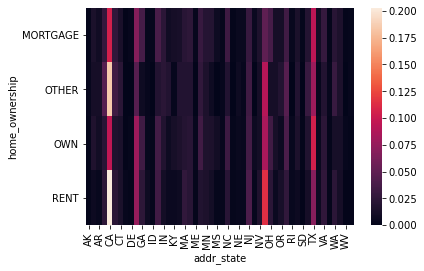

In [68]:
# Home ownership proportion per state

sns.heatmap(pd.crosstab(df['home_ownership'],df['addr_state'], normalize='index'))

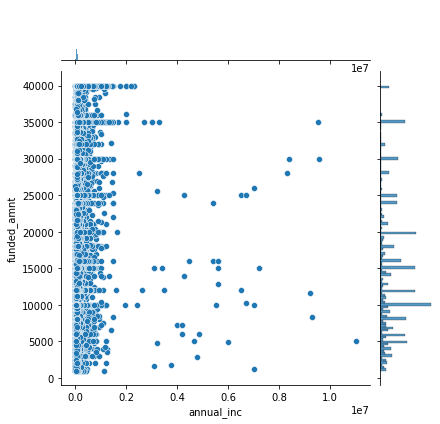

In [69]:
# Income vs loan amt

sns.jointplot(x = df['annual_inc'], y = df['funded_amnt'])

plt.ticklabel_format(style='plain')

There does not seem to be any relation between annual income and loan amount. There are outliers in the plot with very high funded amount and annual income.

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

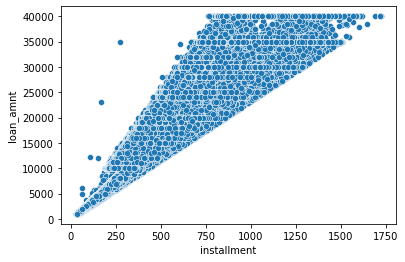

In [70]:
# is the number of installments related to loan amount 

sns.scatterplot(df.installment,df.loan_amnt)

The scatterplot shows a positive linear relationship.

In [713]:
##Charged off vs State

<img src="charged_off_map.png">

#### Mississippi has highest pct of charged off

In [73]:
## Loan status vs No. of mortgage accounts

df.groupby('loan_status')['mort_acc'].describe()

count     mean      std      min      25%      50%  \
loan_status                                                              
0           377259.000000 1.634219 1.880075 0.000000 0.000000 1.000000   
1           105117.000000 1.206636 1.644515 0.000000 0.000000 1.000000   

                 75%       max  
loan_status                     
0           3.000000 51.000000  
1           2.000000 29.000000

In [736]:
pd.crosstab(df['loan_status'],df['mort_acc'], normalize = 'index')

mort_acc     0.000000   1.000000   2.000000   3.000000   4.000000   5.000000   \
loan_status                                                                     
0             0.384677   0.186018   0.161041   0.114086   0.071961   0.040511   
1             0.495495   0.184680   0.133727   0.086722   0.049830   0.025514   

mort_acc     6.000000   7.000000   8.000000   9.000000   10.000000  11.000000  \
loan_status                                                                     
0             0.021357   0.010245   0.004880   0.002349   0.001238   0.000697   
1             0.012377   0.006193   0.002702   0.001465   0.000523   0.000352   

mort_acc     12.000000  13.000000  14.000000  15.000000  16.000000  17.000000  \
loan_status                                                                     
0             0.000355   0.000183   0.000133   0.000072   0.000045   0.000053   
1             0.000181   0.000067   0.000076   0.000019   0.000038   0.000000   

mort_acc     18.000000  19.000000  20.000000  21.000000  22.000000  23.000000  \
loan_status                                                                     
0             0.000037   0.000013   0.000008   0.000008   0.000008   0.000003   
1             0.000000   0.000010   0.000000   0.000000   0.000000   0.000010   

mort_acc     24.000000  25.000000  26.000000  27.000000  28.000000  29.000000  \
loan_status                                                                     
0             0.000005   0.000003   0.000005   0.000000   0.000005   0.000000   
1             0.000000   0.000000   0.000000   0.000010   0.000000   0.000010   

mort_acc     37.000000  51.000000  
loan_status                        
0             0.000003   0.000003  
1             0.000000   0.000000

#### Ppl who pay off their loans are more likely to have mortgage accounts

In [733]:
pd.crosstab(df['loan_status'],df['pub_rec_bankruptcies'], normalize = 'index')

pub_rec_bankruptcies  0.000000  1.000000  2.000000  3.000000  4.000000  \
loan_status                                                              
0                     0.865048  0.126955  0.006181  0.001333  0.000321   
1                     0.847418  0.142622  0.007820  0.001456  0.000438   

pub_rec_bankruptcies  5.000000  6.000000  7.000000  8.000000  9.000000  
loan_status                                                             
0                     0.000119  0.000034  0.000000  0.000005  0.000003  
1                     0.000143  0.000076  0.000010  0.000019  0.000000

In [735]:
pd.crosstab(df['loan_status'],df['pub_rec_bankruptcies'], margins = True)

pub_rec_bankruptcies     0.0    1.0   2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  \
loan_status                                                                    
0                     326347  47895  2332  503  121   45   13    0    2    1   
1                      89078  14992   822  153   46   15    8    1    2    0   
All                   415425  62887  3154  656  167   60   21    1    4    1   

pub_rec_bankruptcies     All  
loan_status                   
0                     377259  
1                     105117  
All                   482376

#### Pub_rec_bankruptices records does not seem to have a significant impact on charged off

In [809]:
## DTI vs state

<img src="dti_map.png">

#### Idaho state has highest DTI ratio

Text(0, 0.5, 'open_acc')

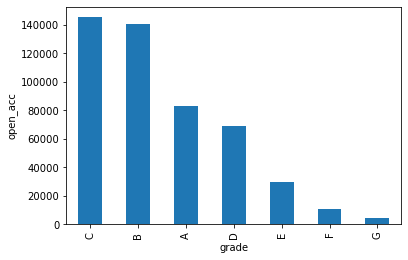

In [712]:
## Count of open credit lines(open_acc) by Grade

df.groupby('grade')['open_acc'].count().sort_values(ascending=False).plot(kind='bar')

plt.ylabel('open_acc')

#### So grade C has highest number of open credit lines in the borrower's credit file.

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

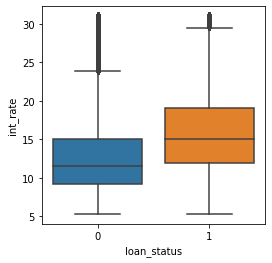

In [836]:
## loan status vs int_rate

plt.figure(figsize = (4,4))

sns.boxplot(x='loan_status',y='int_rate',data=df)


#### Charged off has higher interest rates as compared to full paid loan status

<AxesSubplot:xlabel='term', ylabel='int_rate'>

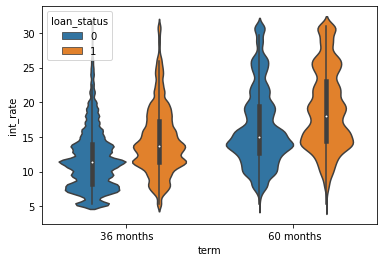

In [80]:
## Term vs int_rate vs status

sns.violinplot(x='term',y='int_rate',hue='loan_status',data=df)

#### More people have higher interest rates for the 60 month term for loan when compared to 36 month term.

<Figure size 1080x576 with 0 Axes>

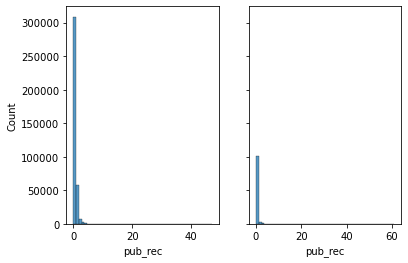

In [627]:
## Derogatory public records vs loan status

plt.figure(figsize=(15,8))

fig,axis = plt.subplots(1,2, sharey=True)
sns.histplot(df['pub_rec'][df['loan_status']==0], bins=50, ax = axis[0])
sns.histplot(df['pub_rec'][df['loan_status']==1], bins=50, ax = axis[1])

plt.show()

Text(0, 0.5, 'Average Loan Amount')

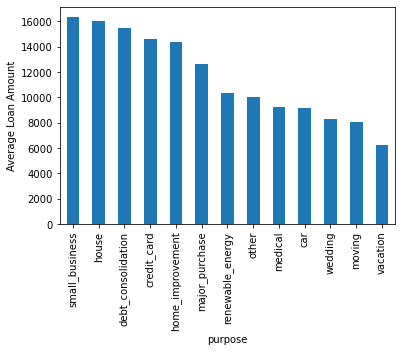

In [840]:
## Purpose vs loan amt

df.groupby('purpose')['loan_amnt'].mean().sort_values(ascending=False).plot(kind='bar')

plt.ylabel('Average Loan Amount')

#### Avg loan amount is higher of categories like small_business,house..

## Analysing relationship between target variable and categorical variables

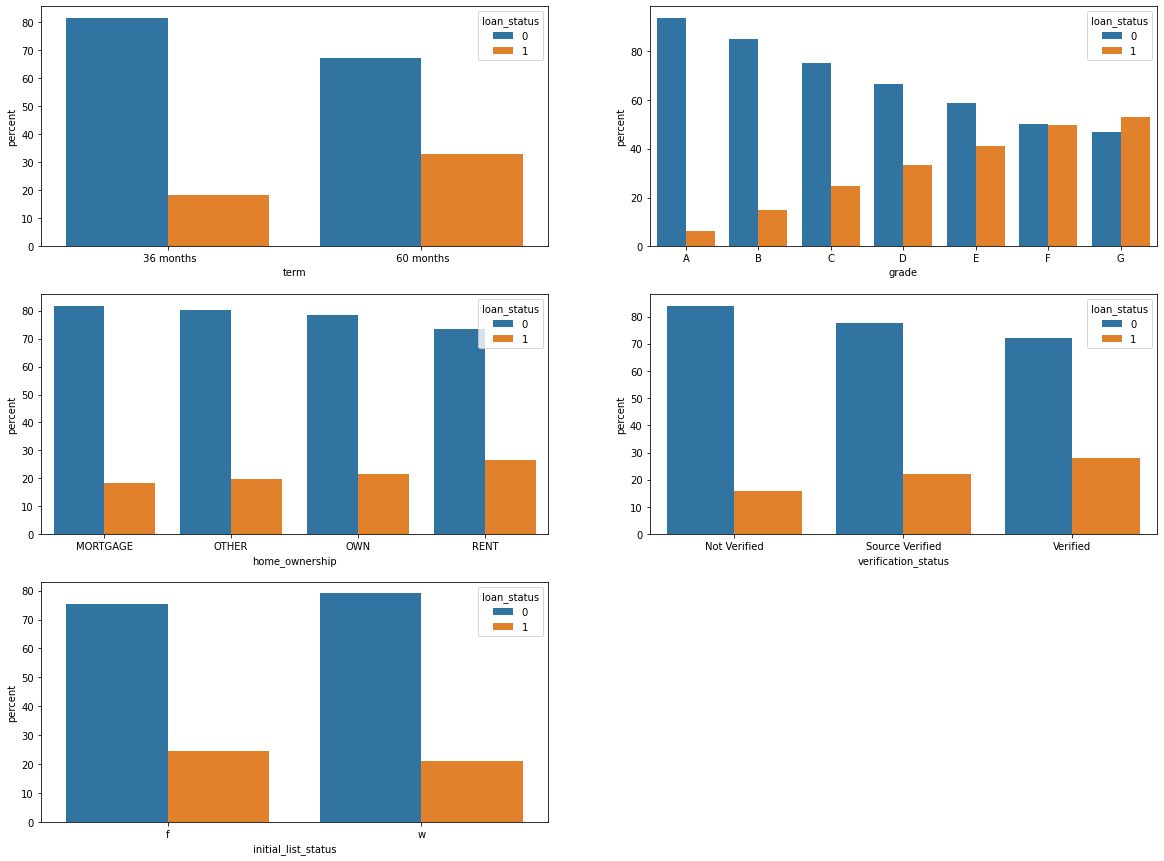

In [87]:
cols = ['term','grade','home_ownership','verification_status','initial_list_status']

plt.figure(figsize = (20,15))

for i in range(1,len(cols)+1):    
    plt.subplot(3,2,i)
    df1 = df.groupby(cols[i-1])['loan_status'].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()
    sns.barplot(data=df1,x = df1.columns[0],y='percent',hue='loan_status')

#### Most of the fully paid loans are for term 36 months
#### Grade C has highest charged off count
#### Verified source has more charged off ratio as compared to not verified

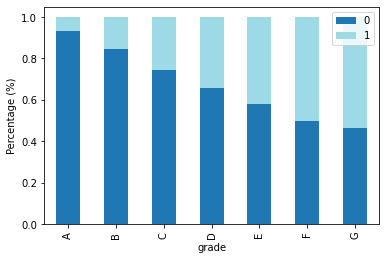

In [844]:
# percentage of defaulters for each grade

cmap = cm.get_cmap('tab20') 

pd.crosstab(df['grade'], df['loan_status'], normalize = 'index').plot(kind = 'bar', stacked = True,cmap=cmap)

plt.ylabel('Percentage (%)')

plt.legend(loc = 'upper right')

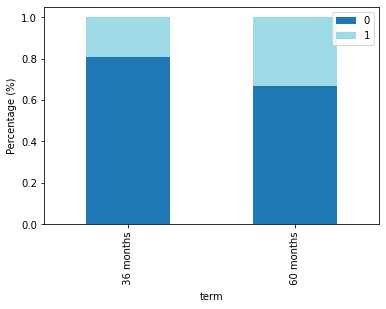

In [845]:
# percentage of defaulters for each term category

cmap = cm.get_cmap('tab20') 

pd.crosstab(df['term'], df['loan_status'], normalize = 'index').plot(kind = 'bar', stacked = True,cmap=cmap)

plt.ylabel('Percentage (%)')

plt.legend(loc = 'upper right')

<AxesSubplot:xlabel='emp_length', ylabel='count'>

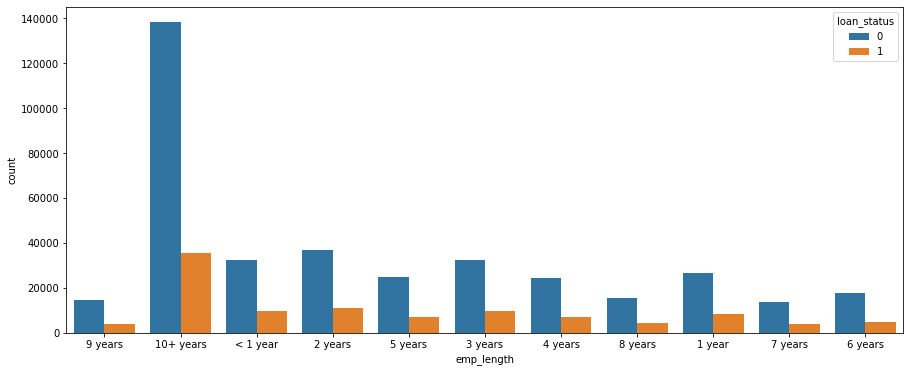

In [806]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='emp_length', hue='loan_status')

#### Emp length of 10+years has most number of Fully paid loans 

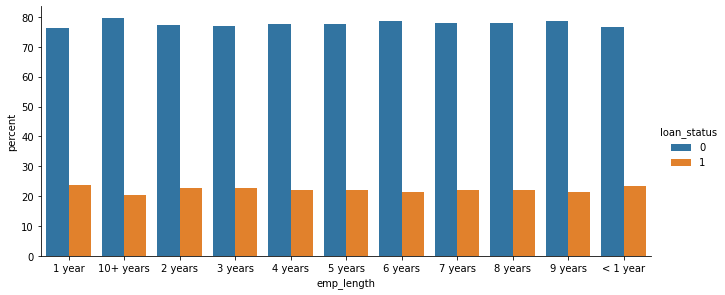

In [89]:
#df.groupby('loan_status')['emp_length'].value_counts(normalize=True).plot(kind='bar')

x,y = 'emp_length', 'loan_status'
           
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,
                y='percent',
                hue=y,
                kind='bar',
                data=df1, height=4, aspect=18.7/8.27)


#### Percentage of Fully paid vs Charged off more or less remains the same across all emp length

<AxesSubplot:xlabel='purpose', ylabel='count'>

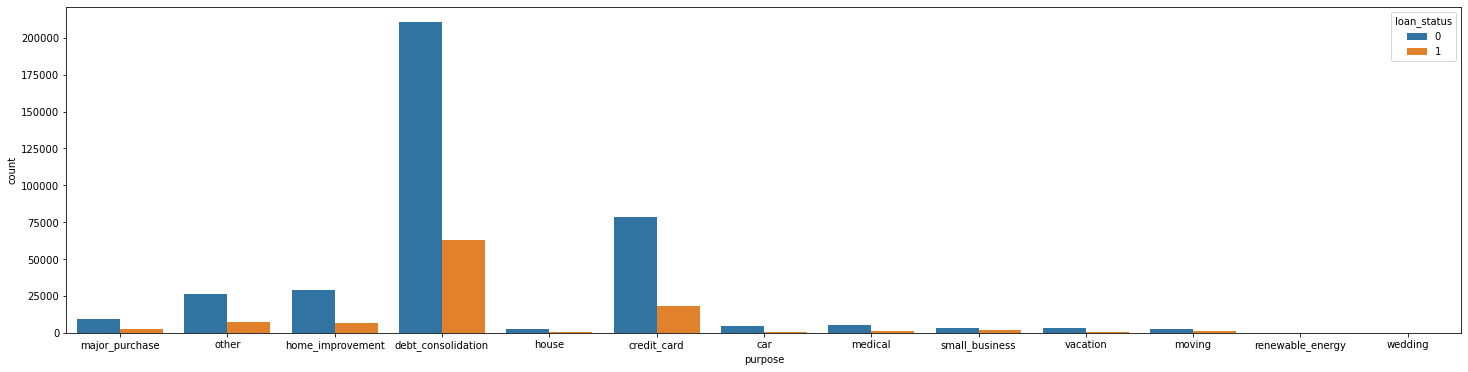

In [90]:
plt.figure(figsize=(25,6))
sns.countplot(data=df, x='purpose', hue='loan_status')

#### Most of the loans were fully paid with the purpose which they were granted being Debt_consolidation

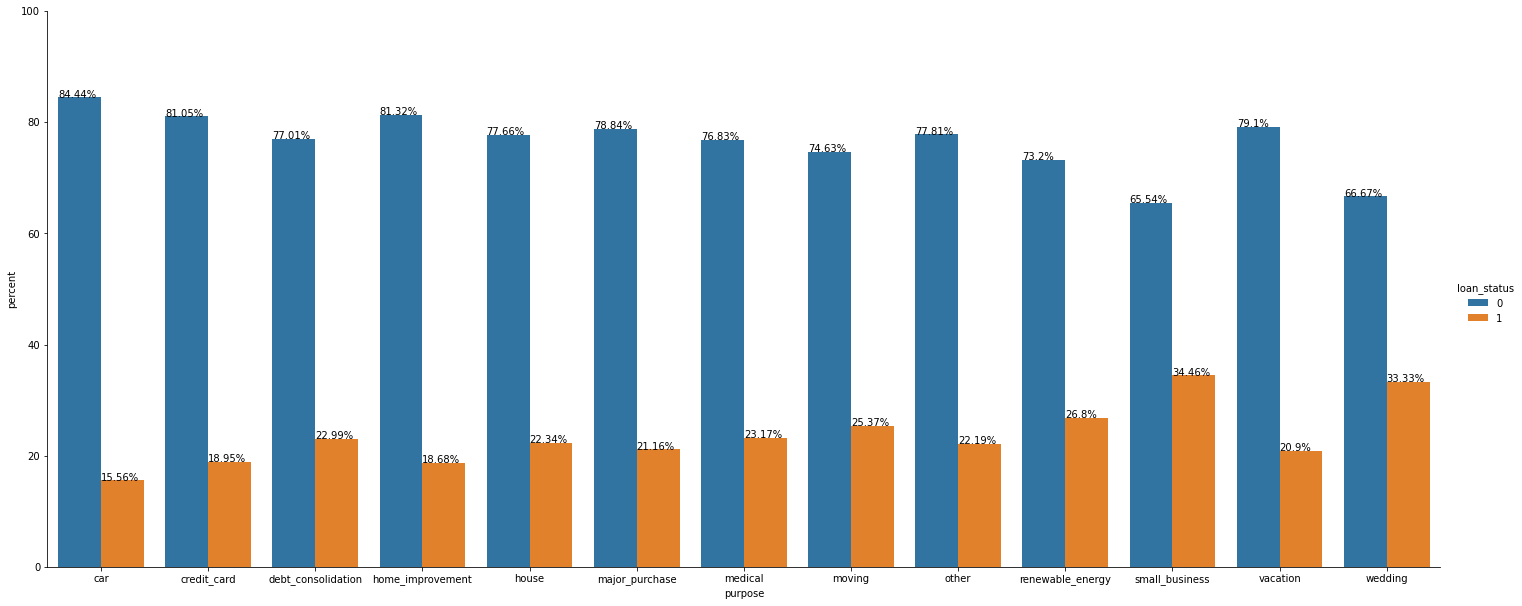

In [91]:
x,y = 'purpose', 'loan_status'
           
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,
                y='percent',
                hue=y,
                kind='bar',
                data=df1, height=8.27, aspect=20/8.27)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [113]:
df_2 = df_orig.copy()

df_2['issue_month'] = df_2['issue_d'].str.split('-').apply(lambda X : X[0])
df_2['issue_year'] = df_2['issue_d'].str.split('-').apply(lambda X : X[1])
df_2['issue_year'] = pd.to_numeric(df_2['issue_year'])

<AxesSubplot:xlabel='issue_month', ylabel='count'>

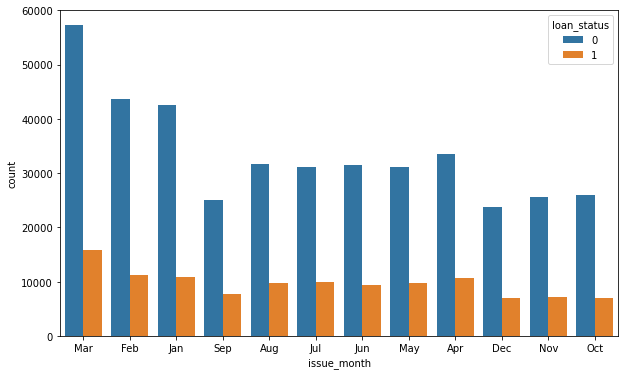

In [114]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_2, x='issue_month', hue='loan_status')

#### March has the highest issue of fully paid loans

In [115]:
months = {"Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5, "Jun":6, "Jul":7, 
          "Aug":8, "Sep":9 , "Oct":10, "Nov":11, "Dec":12}
df_2.replace({"issue_month": months}, inplace=True)

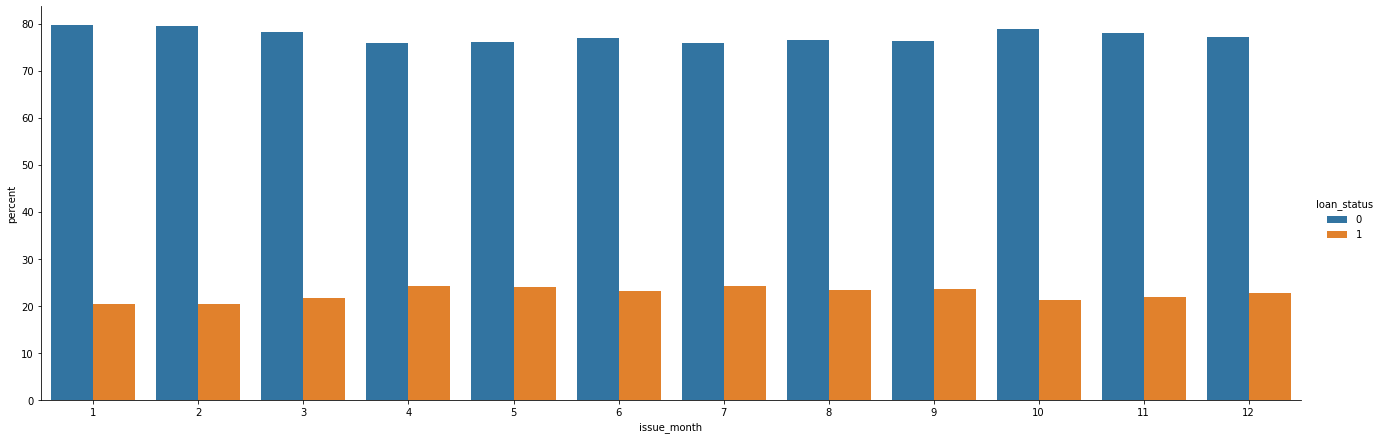

In [116]:
#df.groupby('loan_status')['emp_length'].value_counts(normalize=True).plot(kind='bar')

x,y = 'issue_month', 'loan_status'
           
df1 = df_2.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,
                y='percent',
                hue=y,
                kind='bar',
                data=df1, height=6, aspect=25/8.27)

#### The proportion of people in both categories of loan status is alomst the same for all issue months. 

<AxesSubplot:xlabel='issue_year', ylabel='count'>

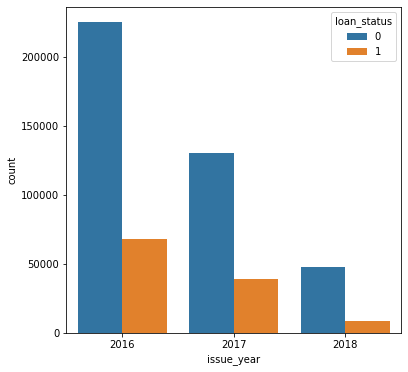

In [117]:
plt.figure(figsize=(6,6))
sns.countplot(data=df_2, x='issue_year', hue='loan_status')

#### Year 2016 has highest number of full paid loans and Charged off loans as comapared to rest of the years

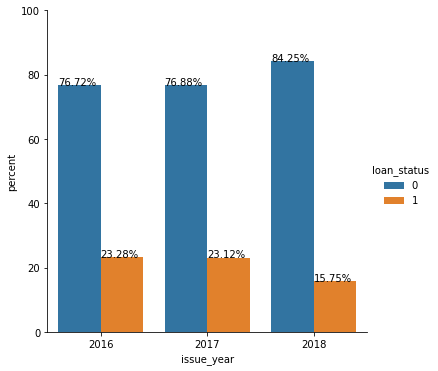

In [118]:
#df.groupby('loan_status')['emp_length'].value_counts(normalize=True).plot(kind='bar')

x,y = 'issue_year', 'loan_status'
           
df1 = df_2.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,
                y='percent',
                hue=y,
                kind='bar',
                data=df1)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

#### Although the count of records reduces form 2016 to 2018, we see that the proportion of people who have fully paid the loan is consistently high for all years (above 75 %).

<a id="stat"></a>

# Statistical Tests

### Is the mean annual income significantly different for defaulters and non-defaulters?

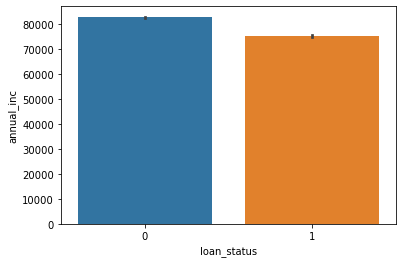

In [96]:
sns.barplot(data = df , x = 'loan_status', y = 'annual_inc')

plt.show()

In [97]:
# Check if the data is normal

stats.shapiro(df['annual_inc'])

ShapiroResult(statistic=0.3679984211921692, pvalue=0.0)

In [98]:
# pvalue < 0.05 , we can reject H0
# The data is not normal so we opt for Mann-Whitney U

In [99]:
# Mann-Whitney U Test

# H0: Both distibutions come from the same population
# H1: Both distibutions do not come from the same population

# significance level (alpha) = 0.05

x = df[df['loan_status']==0]['annual_inc']
y = df[df['loan_status']==1]['annual_inc']

stats.mannwhitneyu(x,y)

MannwhitneyuResult(statistic=21562580859.5, pvalue=0.0)

In [100]:
# since pvalue < alpha, we reject H0
# We conclude that the two distibutions do not come from the same population
# The distribution of annual income is different for defaulters and non defaulters

### Is the average interest rate significantly different for defaulters and non-defaulters?

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

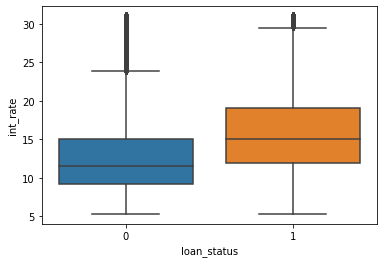

In [823]:
sns.boxplot(x='loan_status',y='int_rate',data=df)

In [102]:
# Check if the data is normal

# H0: The data is normal
# H1: The data is not normal

stats.shapiro(df['int_rate'])

ShapiroResult(statistic=0.9425936937332153, pvalue=0.0)

In [103]:
# pvalue < 0.05 , we can reject H0
# The data is not normal so we opt for Mann-Whitney U

In [104]:
# Mann-Whitney U Test

# H0: Both distibutions come from the same population
# H1: Both distibutions do not come from the same population

# significance level (alpha) = 0.05

x = df[df['loan_status']==0]['int_rate']
y = df[df['loan_status']==1]['int_rate']

stats.mannwhitneyu(x,y)

MannwhitneyuResult(statistic=12383334742.5, pvalue=0.0)

In [105]:
# since pvalue < alpha, we reject H0
# We conclude that the two distibutions do not come from the same population
# The distribution of interest rate is significantly different for defaulters and non defaulters

### Is loan amount statistically significant for different categories of Home Ownership?

<AxesSubplot:xlabel='home_ownership', ylabel='loan_amnt'>

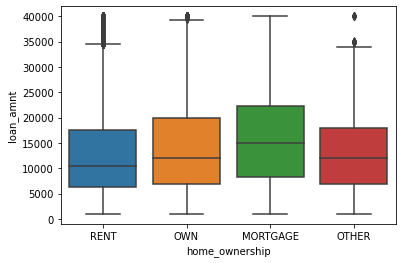

In [106]:
sns.boxplot(data = df, x = 'home_ownership', y = 'loan_amnt')

In [107]:
# Check if the data is normal

# H0: The data is normal
# H1: The data is not normal

# significance level (alpha) = 0.05

stats.shapiro(df['loan_amnt'])

ShapiroResult(statistic=0.9294409155845642, pvalue=0.0)

In [108]:
# pvalue < 0.05 , we can reject H0
# The data is not normal so we opt for Kruskal Wallis test

In [109]:
# H0 : The medians of all groups are equal
# H1: At least one median is significantly different from the other

x1 = df[df['home_ownership']=='RENT']['loan_amnt']
x2 = df[df['home_ownership']=='OWN']['loan_amnt']
x3 = df[df['home_ownership']=='MORTGAGE']['loan_amnt']
x4 = df[df['home_ownership']=='OTHER']['loan_amnt']

stats.kruskal(x1,x2,x3,x4)

KruskalResult(statistic=12181.906670141225, pvalue=0.0)

In [110]:
# pvalue < 0.05 , we can reject H0
# We infer that at least at least one median is significantly different from the other

### Is Loan Status dependent on Grade?

In [111]:
# H0: Loan status and grade are independent
# H1: Loan status and grade are not independent

# significance level (alpha) = 0.05

c = pd.crosstab(df['loan_status'], df['grade'])
c

grade            A       B       C      D      E     F     G
loan_status                                                 
0            77555  119644  109524  46026  17314  5312  1884
1             5268   21081   36034  23149  12168  5290  2127

In [112]:
# All cell values are greater than 5, so our assumptions are satisfied

In [113]:
chi_stat = stats.chi2_contingency(c)[0]
pvalue = stats.chi2_contingency(c)[1]
print('Test statistic:', chi_stat)
print('pvalue:', pvalue)

Test statistic: 35458.66617098625
pvalue: 0.0


In [114]:
# pvalue < 0.05, 
# so we reject H0
# We have significant evidence to suggest that Loan status and grade are not independent

### Is Loan Status dependent on Home Ownership?

In [115]:
# H0: Loan status and grade are independent
# H1: Loan status and grade are not independent

# significance level (alpha) = 0.05

c2 = pd.crosstab(df['loan_status'], df['home_ownership'])
c2

home_ownership  MORTGAGE  OTHER    OWN    RENT
loan_status                                   
0                 195609    213  43788  137649
1                  43496     52  12090   49479

In [116]:
chi_stat = stats.chi2_contingency(c2)[0]
pvalue = stats.chi2_contingency(c2)[1]
print('Test statistic:', chi_stat)
print('pvalue:', pvalue)

Test statistic: 4193.976261381741
pvalue: 0.0


In [117]:
# pvalue < 0.05, 
# so we reject H0
# We have significant evidence to suggest that Loan status and Home Ownership are not independent

### Is the median no. of public records significantly different for defaulters and non-defaulters?

<AxesSubplot:xlabel='loan_status', ylabel='pub_rec_bankruptcies'>

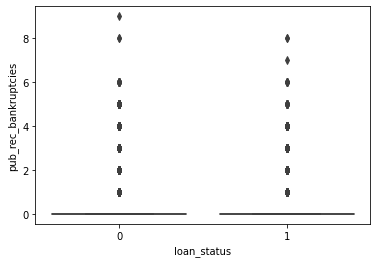

In [118]:
sns.boxplot(x='loan_status',y='pub_rec_bankruptcies',data=df)

In [119]:
stats.shapiro(df['pub_rec_bankruptcies'])

ShapiroResult(statistic=0.40770071744918823, pvalue=0.0)

As p-value is less than 0.05, we reject H0 and conclude that data is not normally distributed. So we perform MannWhitneyU

In [120]:
# H0: Both distibutions come from the same population
# H1: Both distibutions do not come from the same population

stats.mannwhitneyu(df['pub_rec_bankruptcies'],df['loan_status'])

MannwhitneyuResult(statistic=107351719224.0, pvalue=0.0)

As p-value is less than 0.05, we reject H0 and conclude that 2 samples are drawn from different distributions

## Is the median revol_bal significantly different for defaulters and non-defaulters?

<AxesSubplot:xlabel='loan_status', ylabel='revol_bal'>

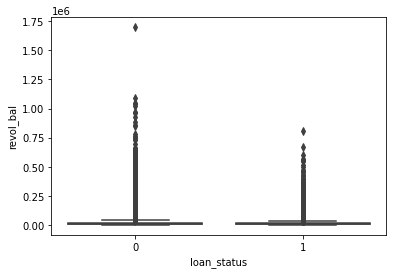

In [121]:
sns.boxplot(x='loan_status',y='revol_bal',data=df)

In [126]:
stats.shapiro(df['revol_bal'])

ShapiroResult(statistic=0.4744724631309509, pvalue=0.0)

As p-value is less than 0.05, we reject H0 and conclude that data is not normally distributed

In [716]:
# H0: Both distibutions come from the same population
# H1: Both distibutions do not come from the same population

stats.mannwhitneyu(df['pub_rec_bankruptcies'],df['revol_bal'])

MannwhitneyuResult(statistic=759358512.5, pvalue=0.0)

As p-value is less than 0.05, we reject H0 and conclude that 2 samples are drawn from different distributions

<a id = 'outliers'> </a>
# Outlier Treatment

loan_amt: 1.32% outliers. Some large loans may be taken by high income borrowers. They can be removed as they are outliers.

int_rate: 3.25%. Differs based on the risk of the loans. The highest interest rates are Grade E, F, G loans. 

Installments: 3.07%. Vary depending on the loan terms and is highly correlated with loan amount. Larger loans lead to larger installments.

Annual income: 4.69%. Has outliers due to the variety of occupations of people and purposes applying for loans.

The DTI ratio: 0.9%. has very little outliers. This shows that higher annual income leads to higher loan amounts.

inq_last_6mths: 4.1%. is the number of inquiries in past 6 months (excluding auto and mortgage inquiries). The range is from 0 to 5. 3 and above are outliers. 

mths_since_last_delinq (0.03%) and mths_since_last_record(0.09%) have very little outliers. 

open_acc: 2.69%. Is number of open credit lines in the borrower's credit file. It's a preset borrowing limit that can be tapped into at any time. The borrower can take money out as needed until the limit is reached. Most outliers are from higher grades A, B, C.

revol_util: 0.006% is revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. Very small number of outliers.

total_acc: 2.51% is total number of credit lines currently in the borrower's credit file. Not many outliers.
collections_12_mths_ex_med: 1.97% is number of collections in 12 months excluding medical collections. Few outliers

mths_since_last_major_derog: 0.023% is months since most recent 90-day or worse rating. Almost no outliers.

tot_cur_bal: 3.42%. Is total collection amounts ever owed. This will depend on the original loan amounts and the number of loans taken.

chargeoff_within_12_mths: 0.83% and acc_now_delinq: 0.5%. Most are at 0. Anybody with 1 or more is considered an outlier.

mort_acc: 0.93%. Number of mortgage accounts. Most have under 10. Above that are outliers.

mths_since_recent_bc_dlq: 0.026%. Months since most recent bankcard delinquency. Very small percentage of outliers.

num_accts_ever_120_pd: Number of accounts ever 120 or more days past due. Most are at 0. 120 days and above are outliers.

tot_hi_cred_lim: Total high credit/credit limit. This will depend on income and amount in bank. Higher will lead to higher credit limit.


In [40]:
cols = ['collections_12_mths_ex_med','tot_cur_bal', 'chargeoff_within_12_mths',
          'acc_now_delinq', 'mort_acc',
           'num_accts_ever_120_pd','tot_hi_cred_lim','loan_amnt', 'int_rate',
       'installment', 'annual_inc', 'dti', 'inq_last_6mths','open_acc', 'revol_util', 'total_acc']
    
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)

IQR = Q3-Q1
df_no_out = df[~((df[cols] < (Q1 - 6*IQR)) | (df[cols] > (Q3 + 6*IQR))).any(axis = 1)]

In [41]:
# Check the shape of the data
print('Original Shape:',df.shape)
print('New Shape:',df_no_out.shape)

Original Shape: (482376, 35)
New Shape: (354861, 35)


<a id = 'mult'> </a>
## Multicollinearity

<AxesSubplot:>

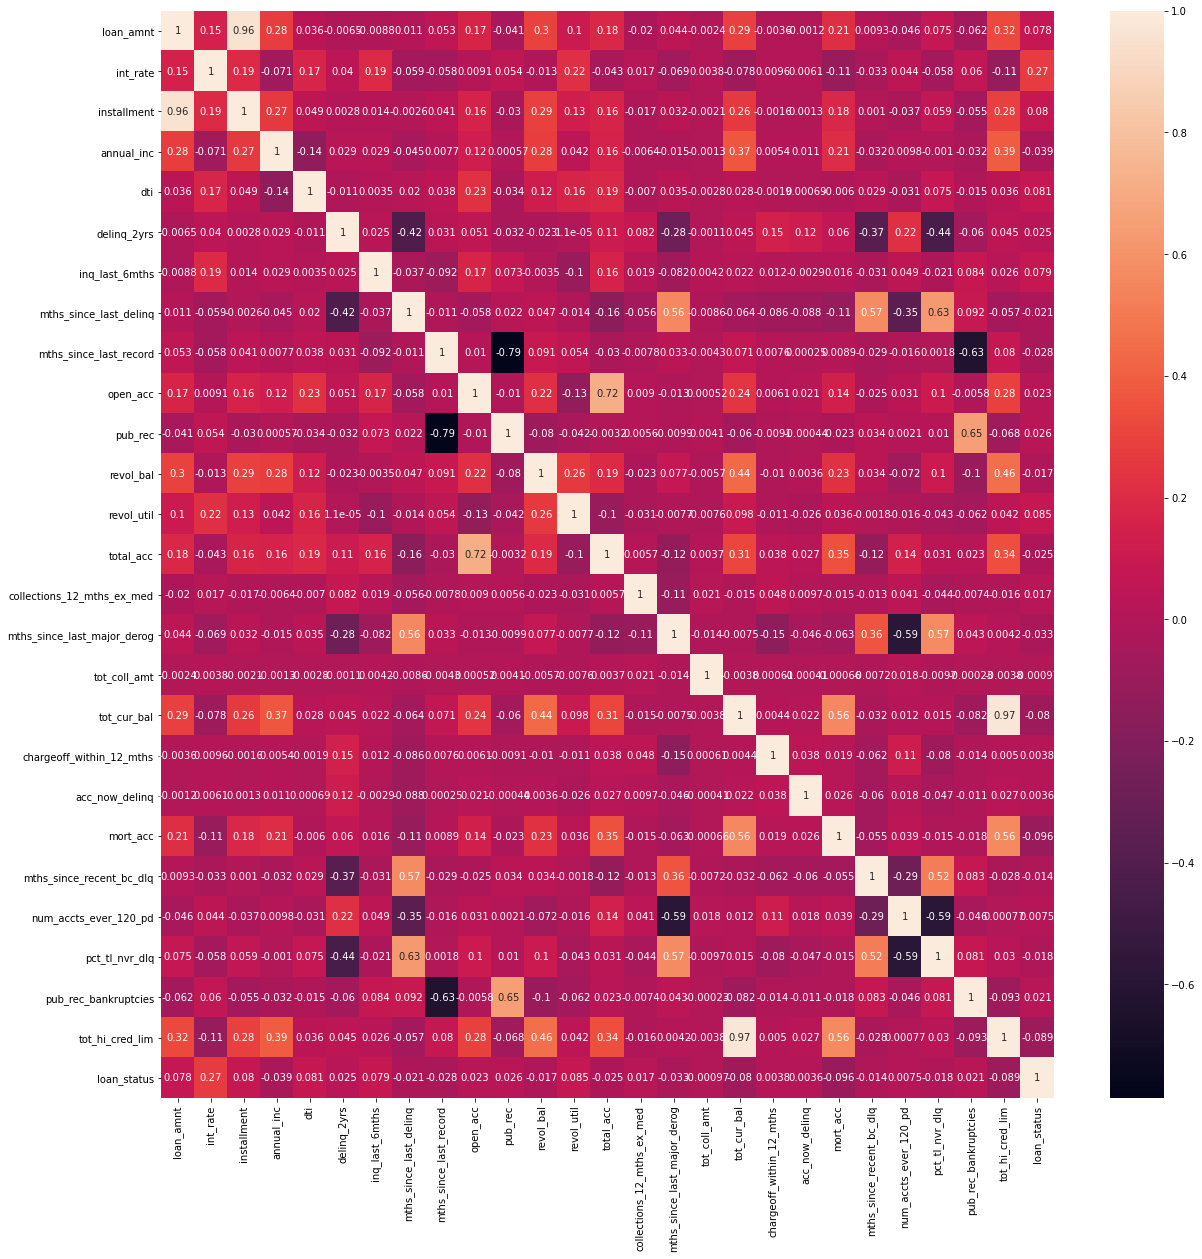

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [34]:
#HIGH CORRELATION (0.9<)
#Installment and loan_amt is highly correlated, as the loan amount must be paid off in equal installments over the term. 
#Total current balance of all accounts is highly correlated with total high credit/credit limit. The more balance one has, the more likely they are offered a higher limit.

#MEDIUM CORRELATION (0.45<corr<0.7)
#tot_acc = The total number of credit lines currently in the borrower's credit file
#open_acc = The number of open credit lines in the borrower's credit file.
#These two columns are similar in nature. Thus 0.69 correlation.

#pub_rec_bankruptcies and pub_rec are also similar columns. 0.65 correlation.
#pub_rec = Number of derogatory public records
#pub_rec_bankruptcies = Number of public record bankruptcies

#pct_tl_nvr_dlq is Percent of trades never delinquent
#Negatively correlated with:
#(-0.45)The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
#(-0.6)Number of accounts ever 120 or more days past due
#These columns are almost opposite in nature

## Removing Multicollineairty with VIF method

<AxesSubplot:>

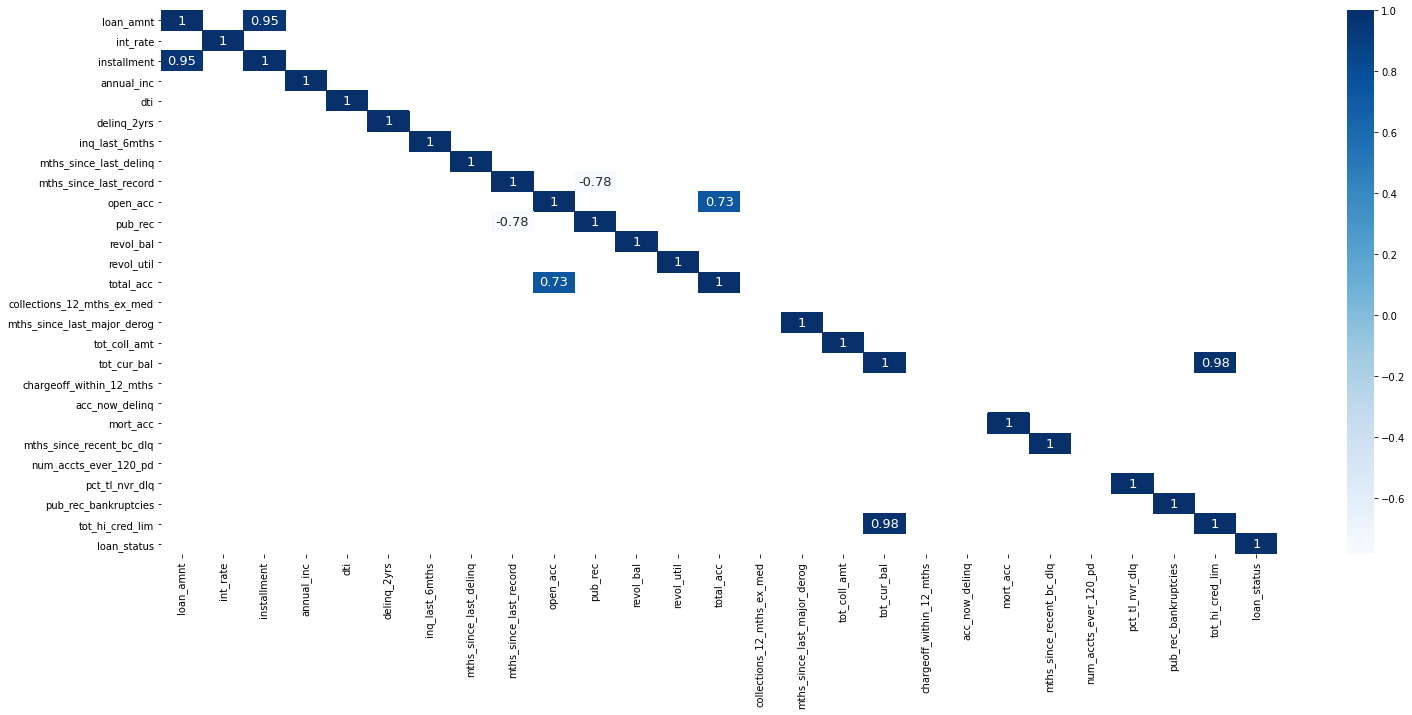

In [43]:
plt.figure(figsize=(25,10))
sns.heatmap(df_no_out.corr()[np.abs(df_no_out.corr()) > 0.7], annot = True, annot_kws = {"size": 13}, cmap = 'Blues')

From the above heatmap, we can see (installment and loan_amount), (tot_hi_cred_lim & tot_cur_bal) have high collinearity

In [44]:
def vif(df_numeric_features_vif):
    # for each numeric variable, calculate VIF and save it in a dataframe 'vif'

    # use for loop to iterate the VIF function 
    for ind in range(len(df_numeric_features_vif.columns)):

        # create an empty dataframe
        vif = pd.DataFrame()

        # calculate VIF using list comprehension
        # use for loop to access each variable 
        # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
        vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

        # create a column of variable names
        vif["Features"] = df_numeric_features_vif.columns

        # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
        # one can choose the threshold other than 10 (it depends on the business requirements)
        multi = vif[vif['VIF_Factor'] > 10]

        # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
        # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
        # 'by' sorts the data using given variable(s)
        # 'ascending = False' sorts the data in descending order
        if(multi.empty == False):
            df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
        else:
            print(vif)
            break

        # use if-else to drop the variable with the highest VIF
        # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
        # select the variable using 'iloc[]'
        # 'axis=1' drops the corresponding column
        #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
        if (df_sorted.empty == False):
            df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
        else:
            print(vif)
            
    return df_numeric_features_vif

In [45]:
df_num = df_no_out.select_dtypes(include=[np.number]).drop('loan_status', axis = 1)
df_numeric_features_vif = vif(df_num)

    VIF_Factor                    Features
0     7.889646                    int_rate
1     4.836203                 installment
2     6.718561                  annual_inc
3     6.698476                         dti
4     1.394774                 delinq_2yrs
5     1.577462              inq_last_6mths
6     3.934120      mths_since_last_delinq
7     6.395278                    open_acc
8     2.180970                     pub_rec
9     2.317871                   revol_bal
10    5.624610                  revol_util
11         NaN  collections_12_mths_ex_med
12    1.006161                tot_coll_amt
13    3.890946                 tot_cur_bal
14         NaN    chargeoff_within_12_mths
15         NaN              acc_now_delinq
16    2.551619                    mort_acc
17         NaN       num_accts_ever_120_pd
18    2.238194        pub_rec_bankruptcies


In [46]:
df_numeric_features_vif.shape

(354861, 19)

#### Concatinating vif columns and categorical columns to create new df

In [47]:
col = list(df_numeric_features_vif.columns)

In [48]:
df_no_out_num_vif = df_no_out[col]

In [49]:
df_no_out_num_vif.shape

(354861, 19)

In [50]:
df_no_out_cat = df_no_out.select_dtypes(include='object')

In [51]:
df_no_out_cat.shape

(354861, 8)

In [52]:
df_no_out_num_vif.reset_index(drop=True,inplace=True)
df_no_out_cat.reset_index(drop=True,inplace=True)

In [53]:
df_no_out_vif = pd.concat([df_no_out_num_vif,df_no_out_cat],axis=1)

In [54]:
df_no_out_vif.head()

int_rate  installment    annual_inc       dti  delinq_2yrs  inq_last_6mths  \
0  7.340000    93.100000  52000.000000  0.580000     0.000000        0.000000   
1 20.390000   560.940000  85000.000000 15.760000     1.000000        0.000000   
2  9.430000   838.710000 150000.000000  4.090000     0.000000        0.000000   
3  5.310000   150.560000  36610.000000 13.850000     0.000000        1.000000   
4  6.070000   456.810000  86000.000000  9.660000     0.000000        0.000000   

   mths_since_last_delinq  open_acc  pub_rec    revol_bal  revol_util  \
0               26.000000  7.000000 0.000000   141.000000    0.500000   
1                2.000000 15.000000 0.000000 14591.000000   34.200000   
2              227.000000  6.000000 1.000000  4373.000000    9.400000   
3              227.000000 15.000000 0.000000  8623.000000    9.200000   
4              227.000000 13.000000 0.000000 13848.000000   11.700000   

   collections_12_mths_ex_med  tot_coll_amt   tot_cur_bal  \
0                    0.000000      0.000000 150592.000000   
1                    0.000000      0.000000 128270.000000   
2                    0.000000      0.000000  15615.000000   
3                    0.000000      0.000000  17742.000000   
4                    0.000000      0.000000 523637.000000   

   chargeoff_within_12_mths  acc_now_delinq  mort_acc  num_accts_ever_120_pd  \
0                  0.000000        0.000000  4.000000               0.000000   
1                  0.000000        0.000000  3.000000               0.000000   
2                  0.000000        0.000000  0.000000               0.000000   
3                  0.000000        0.000000  0.000000               0.000000   
4                  0.000000        0.000000  1.000000               0.000000   

   pub_rec_bankruptcies        term grade emp_length home_ownership  \
0              0.000000   36 months     A    9 years           RENT   
1              0.000000   60 months     D  10+ years            OWN   
2              1.000000   60 months     B  10+ years       MORTGAGE   
3              0.000000   36 months     A    2 years           RENT   
4              0.000000   36 months     A    2 years       MORTGAGE   

  verification_status             purpose addr_state initial_list_status  
0     Source Verified      major_purchase         WA                   w  
1     Source Verified               house         NY                   w  
2        Not Verified  debt_consolidation         NY                   w  
3        Not Verified         credit_card         NJ                   w  
4        Not Verified    home_improvement         CA                   w

In [55]:
df_no_out_vif.shape

(354861, 27)

<a id="feat"></a>
# Feature Engineering

#### Split the dependent and independent variables.

In [56]:
df_target = df_no_out['loan_status'].copy()
df_feature = df_no_out_vif.copy()

In [57]:
df_target.shape

(354861,)

In [58]:
df_feature.head()

int_rate  installment    annual_inc       dti  delinq_2yrs  inq_last_6mths  \
0  7.340000    93.100000  52000.000000  0.580000     0.000000        0.000000   
1 20.390000   560.940000  85000.000000 15.760000     1.000000        0.000000   
2  9.430000   838.710000 150000.000000  4.090000     0.000000        0.000000   
3  5.310000   150.560000  36610.000000 13.850000     0.000000        1.000000   
4  6.070000   456.810000  86000.000000  9.660000     0.000000        0.000000   

   mths_since_last_delinq  open_acc  pub_rec    revol_bal  revol_util  \
0               26.000000  7.000000 0.000000   141.000000    0.500000   
1                2.000000 15.000000 0.000000 14591.000000   34.200000   
2              227.000000  6.000000 1.000000  4373.000000    9.400000   
3              227.000000 15.000000 0.000000  8623.000000    9.200000   
4              227.000000 13.000000 0.000000 13848.000000   11.700000   

   collections_12_mths_ex_med  tot_coll_amt   tot_cur_bal  \
0                    0.000000      0.000000 150592.000000   
1                    0.000000      0.000000 128270.000000   
2                    0.000000      0.000000  15615.000000   
3                    0.000000      0.000000  17742.000000   
4                    0.000000      0.000000 523637.000000   

   chargeoff_within_12_mths  acc_now_delinq  mort_acc  num_accts_ever_120_pd  \
0                  0.000000        0.000000  4.000000               0.000000   
1                  0.000000        0.000000  3.000000               0.000000   
2                  0.000000        0.000000  0.000000               0.000000   
3                  0.000000        0.000000  0.000000               0.000000   
4                  0.000000        0.000000  1.000000               0.000000   

   pub_rec_bankruptcies        term grade emp_length home_ownership  \
0              0.000000   36 months     A    9 years           RENT   
1              0.000000   60 months     D  10+ years            OWN   
2              1.000000   60 months     B  10+ years       MORTGAGE   
3              0.000000   36 months     A    2 years           RENT   
4              0.000000   36 months     A    2 years       MORTGAGE   

  verification_status             purpose addr_state initial_list_status  
0     Source Verified      major_purchase         WA                   w  
1     Source Verified               house         NY                   w  
2        Not Verified  debt_consolidation         NY                   w  
3        Not Verified         credit_card         NJ                   w  
4        Not Verified    home_improvement         CA                   w

#### Encoding categorical variables

In [59]:
# ordinal encoding for grade

grade_unique = np.sort(df_feature['grade'].unique())
labels = np.arange(len(grade_unique),0, -1)
grade_labels_dict = dict(zip(grade_unique,labels))
grade_labels_dict

{'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}

In [60]:
grade_unique

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [61]:
df_feature['grade'] = df_feature['grade'].map(grade_labels_dict)

In [62]:
# ordinal encoding for employee length 

emp_length_labels_dict = {'< 1 year': 1, '1 year':2,'2 years': 3,'3 years': 4,'4 years': 5,'5 years': 6,'6 years': 7,'7 years':8,'8 years':9,'9 years':10,'10+ years': 11}
df_feature['emp_length'] = df_feature['emp_length'].replace(emp_length_labels_dict)

In [63]:
# for purpose feature debt consolidation and credit card are the major categories we can classify all the other categores as 
# 'other' 

df_feature['purpose'].value_counts()/len(df_feature)

debt_consolidation   0.563097
credit_card          0.211931
home_improvement     0.070650
other                0.068835
major_purchase       0.025452
medical              0.013648
car                  0.011709
small_business       0.010799
vacation             0.008446
moving               0.008102
house                0.006611
renewable_energy     0.000713
wedding              0.000008
Name: purpose, dtype: float64

In [64]:
# reducing the feature to just 3 levels

levels_to_rename = ['major_purchase', 'other', 'home_improvement', 'house', 'car',
                   'medical', 'small_business', 'vacation', 'moving',
                   'renewable_energy', 'wedding']

df_feature['purpose'].replace(levels_to_rename,'other', inplace = True) 

In [65]:
# target encoding the address state column
te_encoder = ce.target_encoder.TargetEncoder()
df_feature['addr_state'] = te_encoder.fit_transform(df_feature.addr_state,df_target)

In [66]:
df_feature.head()

int_rate  installment    annual_inc       dti  delinq_2yrs  inq_last_6mths  \
0  7.340000    93.100000  52000.000000  0.580000     0.000000        0.000000   
1 20.390000   560.940000  85000.000000 15.760000     1.000000        0.000000   
2  9.430000   838.710000 150000.000000  4.090000     0.000000        0.000000   
3  5.310000   150.560000  36610.000000 13.850000     0.000000        1.000000   
4  6.070000   456.810000  86000.000000  9.660000     0.000000        0.000000   

   mths_since_last_delinq  open_acc  pub_rec    revol_bal  revol_util  \
0               26.000000  7.000000 0.000000   141.000000    0.500000   
1                2.000000 15.000000 0.000000 14591.000000   34.200000   
2              227.000000  6.000000 1.000000  4373.000000    9.400000   
3              227.000000 15.000000 0.000000  8623.000000    9.200000   
4              227.000000 13.000000 0.000000 13848.000000   11.700000   

   collections_12_mths_ex_med  tot_coll_amt   tot_cur_bal  \
0                    0.000000      0.000000 150592.000000   
1                    0.000000      0.000000 128270.000000   
2                    0.000000      0.000000  15615.000000   
3                    0.000000      0.000000  17742.000000   
4                    0.000000      0.000000 523637.000000   

   chargeoff_within_12_mths  acc_now_delinq  mort_acc  num_accts_ever_120_pd  \
0                  0.000000        0.000000  4.000000               0.000000   
1                  0.000000        0.000000  3.000000               0.000000   
2                  0.000000        0.000000  0.000000               0.000000   
3                  0.000000        0.000000  0.000000               0.000000   
4                  0.000000        0.000000  1.000000               0.000000   

   pub_rec_bankruptcies        term  grade  emp_length home_ownership  \
0              0.000000   36 months      7          10           RENT   
1              0.000000   60 months      4          11            OWN   
2              1.000000   60 months      6          11       MORTGAGE   
3              0.000000   36 months      7           3           RENT   
4              0.000000   36 months      7           3       MORTGAGE   

  verification_status             purpose  addr_state initial_list_status  
0     Source Verified               other    0.211014                   w  
1     Source Verified               other    0.212167                   w  
2        Not Verified  debt_consolidation    0.212167                   w  
3        Not Verified         credit_card    0.202463                   w  
4        Not Verified               other    0.204197                   w

In [68]:
# apply get dummies to remaining variables 

df_feature_encoded = pd.get_dummies(data = df_feature, drop_first = True)
df_feature_encoded.shape

(354861, 31)

In [69]:
# display the final dataframe

df_feature_encoded.head()

int_rate  installment    annual_inc       dti  delinq_2yrs  inq_last_6mths  \
0  7.340000    93.100000  52000.000000  0.580000     0.000000        0.000000   
1 20.390000   560.940000  85000.000000 15.760000     1.000000        0.000000   
2  9.430000   838.710000 150000.000000  4.090000     0.000000        0.000000   
3  5.310000   150.560000  36610.000000 13.850000     0.000000        1.000000   
4  6.070000   456.810000  86000.000000  9.660000     0.000000        0.000000   

   mths_since_last_delinq  open_acc  pub_rec    revol_bal  revol_util  \
0               26.000000  7.000000 0.000000   141.000000    0.500000   
1                2.000000 15.000000 0.000000 14591.000000   34.200000   
2              227.000000  6.000000 1.000000  4373.000000    9.400000   
3              227.000000 15.000000 0.000000  8623.000000    9.200000   
4              227.000000 13.000000 0.000000 13848.000000   11.700000   

   collections_12_mths_ex_med  tot_coll_amt   tot_cur_bal  \
0                    0.000000      0.000000 150592.000000   
1                    0.000000      0.000000 128270.000000   
2                    0.000000      0.000000  15615.000000   
3                    0.000000      0.000000  17742.000000   
4                    0.000000      0.000000 523637.000000   

   chargeoff_within_12_mths  acc_now_delinq  mort_acc  num_accts_ever_120_pd  \
0                  0.000000        0.000000  4.000000               0.000000   
1                  0.000000        0.000000  3.000000               0.000000   
2                  0.000000        0.000000  0.000000               0.000000   
3                  0.000000        0.000000  0.000000               0.000000   
4                  0.000000        0.000000  1.000000               0.000000   

   pub_rec_bankruptcies  grade  emp_length  addr_state  term_ 60 months  \
0              0.000000      7          10    0.211014                0   
1              0.000000      4          11    0.212167                1   
2              1.000000      6          11    0.212167                1   
3              0.000000      7           3    0.202463                0   
4              0.000000      7           3    0.204197                0   

   home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  \
0                     0                   0                    1   
1                     0                   1                    0   
2                     0                   0                    0   
3                     0                   0                    1   
4                     0                   0                    0   

   verification_status_Source Verified  verification_status_Verified  \
0                                    1                             0   
1                                    1                             0   
2                                    0                             0   
3                                    0                             0   
4                                    0                             0   

   purpose_debt_consolidation  purpose_other  initial_list_status_w  
0                           0              1                      1  
1                           0              1                      1  
2                           1              0                      1  
3                           0              0                      1  
4                           0              1                      1

#### Train Test Split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(df_feature_encoded, df_target, random_state = 10, test_size = 0.2,
                                                   stratify=df_target)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (283888, 31)
y_train (283888,)
X_test (70973, 31)
y_test (70973,)


In [81]:
X_train.head()

int_rate  installment    annual_inc       dti  delinq_2yrs  \
245738 17.990000   361.480000  40000.000000 29.190000     0.000000   
350243  9.490000   307.480000  62000.000000 29.910000     0.000000   
336404 11.440000    82.370000  34000.000000 10.700000     0.000000   
191255  8.490000  1104.710000 225000.000000  7.010000     0.000000   
234874 11.440000   494.220000  84000.000000 34.300000     1.000000   

        inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  \
245738        1.000000              227.000000  8.000000 0.000000   
350243        0.000000              227.000000 10.000000 0.000000   
336404        1.000000              227.000000 15.000000 0.000000   
191255        0.000000              227.000000 14.000000 0.000000   
234874        2.000000               23.000000 18.000000 0.000000   

          revol_bal  revol_util  collections_12_mths_ex_med  tot_coll_amt  \
245738  4974.000000   36.600000                    0.000000      0.000000   
350243  8624.000000   37.000000                    0.000000      0.000000   
336404  3918.000000   14.300000                    0.000000    158.000000   
191255 15311.000000   26.500000                    0.000000      0.000000   
234874 27605.000000   52.800000                    0.000000      0.000000   

         tot_cur_bal  chargeoff_within_12_mths  acc_now_delinq  mort_acc  \
245738  46640.000000                  0.000000        0.000000  0.000000   
350243  73417.000000                  0.000000        0.000000  0.000000   
336404 118731.000000                  0.000000        0.000000  1.000000   
191255 798819.000000                  0.000000        0.000000  2.000000   
234874 328903.000000                  0.000000        0.000000  3.000000   

        num_accts_ever_120_pd  pub_rec_bankruptcies  grade  emp_length  \
245738               0.000000              0.000000      4           7   
350243               0.000000              0.000000      6          11   
336404               0.000000              0.000000      6           3   
191255               0.000000              0.000000      6           2   
234874               0.000000              0.000000      6          11   

        addr_state  term_ 60 months  home_ownership_OTHER  home_ownership_OWN  \
245738    0.206248                0                     0                   0   
350243    0.202855                0                     0                   0   
336404    0.204360                0                     0                   0   
191255    0.204197                0                     0                   0   
234874    0.206248                0                     0                   0   

        home_ownership_RENT  verification_status_Source Verified  \
245738                    1                                    1   
350243                    1                                    1   
336404                    0                                    1   
191255                    0                                    1   
234874                    0                                    0   

        verification_status_Verified  purpose_debt_consolidation  \
245738                             0                           1   
350243                             0                           1   
336404                             0                           0   
191255                             0                           1   
234874                             0                           0   

        purpose_other  initial_list_status_w  
245738              0                      0  
350243              0                      1  
336404              1                      1  
191255              0                      1  
234874              0                      0

In [82]:
X_train.to_csv('X_train.csv',index=False)
y_train.to_csv('y_train.csv',index=False)

In [83]:
X_test.to_csv('X_test.csv',index=False)
y_test.to_csv('y_test.csv',index=False)

# SMOTE 

We apply SMOTE on the train set.

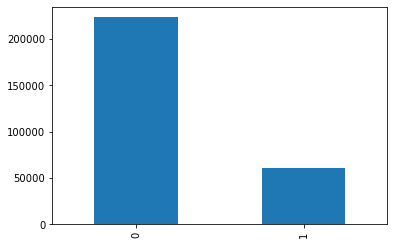

In [84]:
y_train.value_counts().plot(kind = 'bar')

plt.show()

In [85]:
sm = SMOTE(random_state = 10)

X_res, y_res = sm.fit_resample(X_train, y_train)

In [86]:
X_res.shape

(446894, 31)

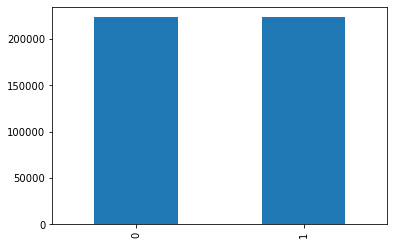

In [115]:
y_res.value_counts().plot(kind = 'bar')

plt.show()

In [139]:
X_res.to_csv('X_res.csv',index=False)
y_res.to_csv('y_res.csv',index=False)

# Scaling

### Scale the train data 

In [89]:
def scale_data(data, cols):
    ss = StandardScaler()
    for i in cols:
        data[i] = ss.fit_transform(pd.DataFrame(data[i]))
        
    return data

In [116]:
num_cols = df_no_out_vif.select_dtypes(np.number).columns

X_train_scaled = scale_data(X_res,num_cols)

y_train = y_res.copy()

In [117]:
X_train_scaled.shape

(446894, 31)

In [118]:
X_train_scaled.head()

int_rate  installment  annual_inc       dti  delinq_2yrs  inq_last_6mths  \
0  0.719915    -0.390997   -0.829485  1.096536    -0.359699        0.470270   
1 -0.899930    -0.588060   -0.323818  1.176787    -0.359699       -0.738006   
2 -0.528319    -1.409555   -0.967394 -0.964367    -0.359699        0.470270   
3 -1.090500     2.321277    3.422712 -1.375656    -0.359699       -0.738006   
4 -0.528319     0.093412    0.181848  1.666098     1.192996        1.678547   

   mths_since_last_delinq  open_acc   pub_rec  revol_bal  revol_util  \
0                0.790978 -0.699990 -0.418000  -0.562714   -0.539902   
1                0.790978 -0.339062 -0.418000  -0.385594   -0.523010   
2                0.790978  0.563257 -0.418000  -0.613957   -1.481638   
3                0.790978  0.382793 -0.418000  -0.061101   -0.966428   
4               -1.513972  1.104649 -0.418000   0.535476    0.144230   

   collections_12_mths_ex_med  tot_coll_amt  tot_cur_bal  \
0                    0.000000     -0.076926    -0.604640   
1                    0.000000     -0.076926    -0.423482   
2                    0.000000      0.011494    -0.116914   
3                    0.000000     -0.076926     4.484169   
4                    0.000000     -0.076926     1.304989   

   chargeoff_within_12_mths  acc_now_delinq  mort_acc  num_accts_ever_120_pd  \
0                  0.000000        0.000000 -0.792695               0.000000   
1                  0.000000        0.000000 -0.792695               0.000000   
2                  0.000000        0.000000 -0.201073               0.000000   
3                  0.000000        0.000000  0.390549               0.000000   
4                  0.000000        0.000000  0.982171               0.000000   

   pub_rec_bankruptcies     grade  emp_length  addr_state  term_ 60 months  \
0             -0.439189 -0.704013    0.094149    0.109672                0   
1             -0.439189  0.809482    1.221776   -0.529882                0   
2             -0.439189  0.809482   -1.033478   -0.246203                0   
3             -0.439189  0.809482   -1.315385   -0.276857                0   
4             -0.439189  0.809482    1.221776    0.109672                0   

   home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  \
0                     0                   0                    1   
1                     0                   0                    1   
2                     0                   0                    0   
3                     0                   0                    0   
4                     0                   0                    0   

   verification_status_Source Verified  verification_status_Verified  \
0                                    1                             0   
1                                    1                             0   
2                                    1                             0   
3                                    1                             0   
4                                    0                             0   

   purpose_debt_consolidation  purpose_other  initial_list_status_w  
0                           1              0                      0  
1                           1              0                      1  
2                           0              1                      1  
3                           1              0                      1  
4                           0              0                      0

### Scale the test data 

In [110]:
X_test_scaled = scale_data(X_test,cols_to_scale)

In [111]:
X_test_scaled.shape

(70973, 31)

In [112]:
X_test_scaled.head()

int_rate  installment  annual_inc       dti  delinq_2yrs  \
143987 -1.475691     0.095663   -0.040501 -1.484813    -0.329291   
270119  0.053785    -0.404090   -0.601486 -0.663658    -0.329291   
61959   0.944887     1.618029   -0.399531  0.985189     1.147347   
335773 -0.929048    -0.932209    0.049257 -1.199478    -0.329291   
197966  1.083420    -0.504686    3.101016  0.072551    -0.329291   

        inq_last_6mths  mths_since_last_delinq  open_acc   pub_rec  revol_bal  \
143987        0.505126                0.741835 -0.652785 -0.394317  -0.117186   
270119       -0.659185                0.741835  0.201132 -0.394317  -0.382832   
61959         0.505126               -1.450232 -0.652785 -0.394317   0.050910   
335773       -0.659185                0.741835 -0.652785  6.236621  -0.382058   
197966        0.505126                0.741835  0.030348 -0.394317  -0.675302   

        revol_util  collections_12_mths_ex_med  tot_coll_amt  tot_cur_bal  \
143987   -0.587360                    0.000000     -0.129314     0.233601   
270119    0.654446                    0.000000     -0.129314    -0.831620   
61959     1.128083                    0.000000     -0.129314    -0.690556   
335773    0.041503                    0.000000     -0.035744    -0.060930   
197966    1.605701                    0.000000     -0.129314     1.111960   

        chargeoff_within_12_mths  acc_now_delinq  mort_acc  \
143987                  0.000000        0.000000  1.934631   
270119                  0.000000        0.000000 -0.813589   
61959                   0.000000        0.000000 -0.813589   
335773                  0.000000        0.000000  0.285699   
197966                  0.000000        0.000000 -0.263945   

        num_accts_ever_120_pd  pub_rec_bankruptcies     grade  emp_length  \
143987               0.000000             -0.402439  1.308848    1.107681   
270119               0.000000             -0.402439 -0.246703    0.571944   
61959                0.000000             -0.402439 -1.024479   -1.303137   
335773               0.000000              2.075851  0.531072   -1.303137   
197966               0.000000             -0.402439 -1.802254   -0.767400   

        addr_state  term_ 60 months  home_ownership_OTHER  home_ownership_OWN  \
143987    0.459651                0                     0                   0   
270119   -1.530951                0                     0                   0   
61959     0.213102                0                     0                   1   
335773   -1.298958                0                     0                   0   
197966    0.657786                0                     0                   0   

        home_ownership_RENT  verification_status_Source Verified  \
143987                    0                                    0   
270119                    1                                    1   
61959                     0                                    1   
335773                    1                                    0   
197966                    0                                    1   

        verification_status_Verified  purpose_debt_consolidation  \
143987                             1                           1   
270119                             0                           0   
61959                              0                           1   
335773                             0                           0   
197966                             0                           1   

        purpose_other  initial_list_status_w  
143987              0                      1  
270119              0                      0  
61959               0                      1  
335773              0                      0  
197966              0                      0

<a id="model"></a>
# Model Building

1. **[Logistic Regression](#logit)**
2. **[Naive Bayes](#naive)**
3. **[Decision Tree](#decision)**
4. **[Random Forest](#random)**
5. **[KNN](#knn)**

<a id="logit"></a>
## Logistic Regression 

### Assumptions

#1 Independence of error, whereby all sample group outcomes are separate from each other (No duplicate reports)
Duplicates have been dropped

#2 Linearity in the logit for any continuous independent variables.


#3 Absence of multicolinearity. Multicolinearity has been checked.


#4 Lack of strongly influential outliers. Outliers have been removed

### Model building

In [149]:
# Build the model
log= LogisticRegression(C=0.05)
log.fit(X_train_scaled, y_res)

LogisticRegression(C=0.05)

In [150]:
y_pred_train = log.predict(X_train_scaled)
print(classification_report(y_res, y_pred_train))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77    223447
           1       0.78      0.75      0.76    223447

    accuracy                           0.77    446894
   macro avg       0.77      0.77      0.77    446894
weighted avg       0.77      0.77      0.77    446894



In [151]:
y_pred= log.predict(X_test_scaled)

# Summary of the prediction
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy
print("Accuracy of the model is: ", accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.65      0.73     55862
           1       0.30      0.55      0.39     15111

    accuracy                           0.63     70973
   macro avg       0.57      0.60      0.56     70973
weighted avg       0.73      0.63      0.66     70973

[[36122 19740]
 [ 6799  8312]]
Accuracy of the model is:  0.6260690685190142


<a id="naive"></a>
# Naive Bayes

### Assumptions

#1 The biggest and only assumption is the assumption of conditional independence.

### Model building

In [126]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_scaled, y_res)

GaussianNB()

In [127]:
y_pred_train = classifier.predict(X_train_scaled)
print(classification_report(y_res, y_pred_train))

              precision    recall  f1-score   support

           0       0.78      0.47      0.59    223447
           1       0.62      0.87      0.73    223447

    accuracy                           0.67    446894
   macro avg       0.70      0.67      0.66    446894
weighted avg       0.70      0.67      0.66    446894



In [128]:
y_pred  =  classifier.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.39      0.54     55862
           1       0.25      0.76      0.38     15111

    accuracy                           0.47     70973
   macro avg       0.55      0.57      0.46     70973
weighted avg       0.73      0.47      0.50     70973



<a id="decision"></a>
## Decision Tree

### Assumptions

#1 At the beginning, we consider the whole training set as the root.

#2 Feature values are preferred to be categorical. 
If the values are continuous then they are discretized prior to building the model.

#3 On the basis of attribute values records are distributed recursively.

#4 We use statistical methods for ordering attributes as root or the internal node.

### Model building

In [129]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train_scaled, y_res)

In [130]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    train_pred = model.predict(X_train_scaled)

    return(classification_report(y_res, train_pred))

In [131]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    test_pred = model.predict(X_test_scaled)
    
    return(classification_report(y_test, test_pred))

**Calculate performance measures on the train set.**

In [132]:
train_report = get_train_report(decision_tree)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    223447
           1       1.00      1.00      1.00    223447

    accuracy                           1.00    446894
   macro avg       1.00      1.00      1.00    446894
weighted avg       1.00      1.00      1.00    446894



**Calculate performance measures on the test set.**

In [133]:
test_report = get_test_report(decision_tree)

print(test_report)

              precision    recall  f1-score   support

           0       0.92      0.04      0.08     55862
           1       0.22      0.99      0.36     15111

    accuracy                           0.24     70973
   macro avg       0.57      0.51      0.22     70973
weighted avg       0.77      0.24      0.14     70973



<a id="random"></a>
# Random Forest

### Assumptions

#1 Assumption of no formal distributions. 
  Being a non-parametric model it can handle skewed and multi-modal data.

## Feature Selection

In [135]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

rfe_model = RFE(estimator=rf_classification)

rfe_model = rfe_model.fit(X_train_scaled, y_res)

feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_scaled.columns)

signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['int_rate', 'installment', 'annual_inc', 'dti', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'tot_cur_bal', 'mort_acc', 'grade', 'emp_length',
       'addr_state'],
      dtype='object')


In [136]:
X_train_scaled_selected = X_train_scaled[signi_feat_rfe]

In [212]:
param_grid = {
    'max_depth': [10,20,50],
    'max_features': [5,8,11],
    'min_samples_leaf': [10,50,100],
    'min_samples_split': [10,50,100],
    'n_estimators': [100]
}

rf = RandomForestClassifier()

grid_search = RandomizedSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring = 'f1')

grid_search.fit(X_train_scaled_selected, y_res)

best_grid = grid_search.best_estimator_

In [ ]:
y_test_pred = best_grid.predict(X_test_scaled[signi_feat_rfe])

print(classification_report(y_test, y_test_pred))

# Weighted Random Forest 

In [137]:
RF = RandomForestClassifier(n_estimators=100,
                            criterion='gini',
                            max_depth=15,
                            min_samples_split=100,
                            min_samples_leaf=100,class_weight={0: 1, 1:3})

In [138]:
RF.fit(X_res, y_res)

RandomForestClassifier(class_weight={0: 1, 1: 3}, max_depth=15,
                       min_samples_leaf=100, min_samples_split=100)

In [80]:
y_pred_test = RF.predict(X_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.72      0.78     70700
           1       0.37      0.58      0.45     20124

    accuracy                           0.69     90824
   macro avg       0.62      0.65      0.62     90824
weighted avg       0.75      0.69      0.71     90824



<a id="knn"></a>
## KNN

### Assumptions

The KNN algorithm assumes that similar things exist in close proximity.
Since KNN is a non-parametric algorithm it does not make assumptions about the distribution of the data

In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [194]:
knn_classification = KNeighborsClassifier(n_neighbors = 10, n_jobs = -1, weights = 'distance')

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train_scaled, y_res)

In [195]:
y_pred = knn_model.predict(X_test_scaled)

confusion_matrix(y_test,y_pred)

array([[37213, 18649],
       [ 7273,  7838]], dtype=int64)

In [196]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.67      0.74     55862
           1       0.30      0.52      0.38     15111

    accuracy                           0.63     70973
   macro avg       0.57      0.59      0.56     70973
weighted avg       0.72      0.63      0.66     70973



# XGBoost

## Basic Model

In [156]:
from xgboost import XGBClassifier

In [183]:
# instantiate the 'XGBClassifier'
# set the maximum depth of the tree using the parameter, 'max_depth'
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model = XGBClassifier(max_depth = 8, gamma = 2, scale_pos_weight = 4)

# fit the model using fit() on train data
xg = xgb_model.fit(X_train, y_train)

[16:32:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [189]:
test_pred = xg.predict(X_test)

# return the classification report for test data
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.65      0.75     55862
           1       0.34      0.66      0.45     15111

    accuracy                           0.65     70973
   macro avg       0.61      0.66      0.60     70973
weighted avg       0.76      0.65      0.68     70973



## Tuned Model

In [172]:
tuning_parameters = {'learning_rate': [0.2,],
                     'max_depth': [3],
                     'gamma': [0]}

# instantiate the 'XGBClassifier' 
xgb_model = XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid.fit(X_train_scaled, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3} 



In [173]:
# instantiate the 'XGBClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

# use fit() to fit the model on the train set
xgb_grid_model_fit = xgb_grid_model.fit(X_train_scaled, y_train)



In [174]:
cm = confusion_matrix(y_test, test_pred)
cm

array([[68834,  1866],
       [17691,  2433]])

In [175]:
# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(xgb_grid_model_fit))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.79      0.98      0.88     70700
           1       0.58      0.10      0.17     20124

    accuracy                           0.78     90824
   macro avg       0.69      0.54      0.53     90824
weighted avg       0.75      0.78      0.72     90824



In [134]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.47      0.62     12735
           1       0.21      0.81      0.34      2260

    accuracy                           0.52     14995
   macro avg       0.57      0.64      0.48     14995
weighted avg       0.82      0.52      0.58     14995

